In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
%matplotlib notebook

::::{only} latex
:::{note}
Please visit {{ '[the web version of this section]({website}/{path}.html)'.format(website=web_ver_url, path=env.docname) }} to engage with this interactive resource.
:::
::::

# JNB LAB: Calculus Animations

```{index} animation
```

In this JNB, we will show how to create animations that illustrate basic calculus concepts. To create an animation, we use a **for** loop to create single frames of the animation '0.png', '1.png', '2.png',.... and then use a block of code to combine the individual frames into a .gif animation.

```{index} tangent line
```

```{index} secant line
```

## Tangent Lines

Let's begin by showing how secants approach a tangent line.  We will use the function $f(x)=x^2$ and create a sequence of secants that approach the tangent line at point $x=4$. 

<img src="secant.gif" style="width:800px; height:auto;">
 
First, let's define our function and specify the point of tangency.

In [2]:
f = lambda x : x**2 # Define the function f(x)
a=4   #x coordinate of point of tangency

Now let's create the first frame ($n=0$)  of the sequence of images $\{n.png\}$ used to create the animation.

<IPython.core.display.Javascript object>


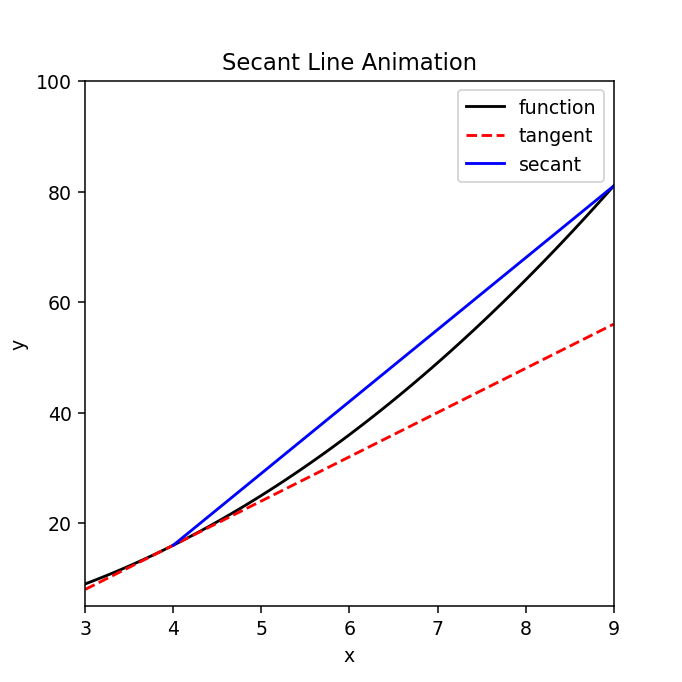

In [3]:
n=0

#---set the figure specs
fig = plt.figure(figsize=(5,5))
plt.xlim(3,9)
plt.ylim(5,100)
#---plot the function f(x) in black---
x = np.linspace(3, 9, 100)
y=f(x)
plt.plot(x,y,color='k')
#---plot the tangent line in red---
y_tan= f(a)+2*a*(x-a)
plt.plot(x,y_tan,'r--') 
#---plot the secant segment in blue---
b=a+5/(n+1)
x_sec=np.linspace(a, b, 50)
y_sec= f(a) + (f(b) - f(a)) / (b - a) * (x_sec - a)
plt.plot(x_sec,y_sec,color='b')
# Set the x-axis and y-axis labels
plt.xlabel('x')
plt.ylabel('y')

# Set the title
plt.title('Secant Line Animation')

# Set the legend
plt.legend(['function','tangent','secant'])

# Save the figure
plt.savefig(str(n)+'.png')
plt.show()

To create our animation, we will:

i) import a couple of functions used to create the animation 

ii) specify the number of frames

iii) specify our function and point of tangency (assuming we haven't done so previously)

iv) use a for loop to create the individual frames in the animation

v) combine the frames into an animation file "secant.gif" which is found in the same folder as this lab.

<IPython.core.display.Javascript object>


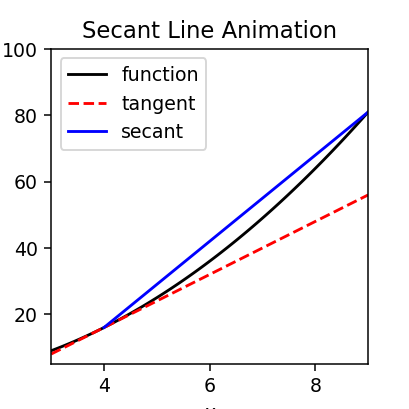

<IPython.core.display.Javascript object>


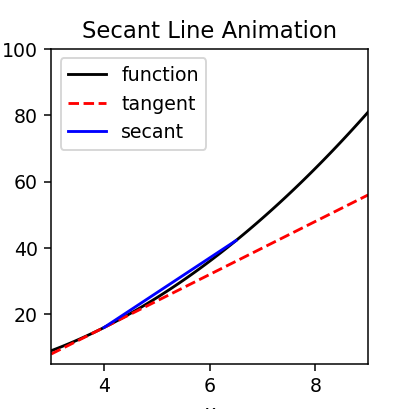

<IPython.core.display.Javascript object>


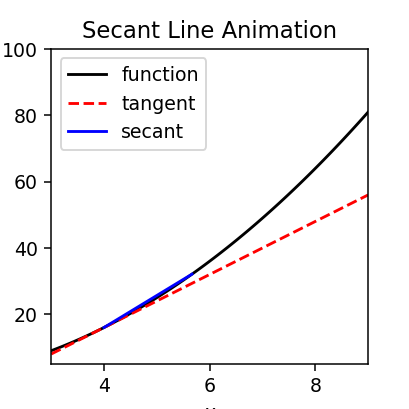

<IPython.core.display.Javascript object>


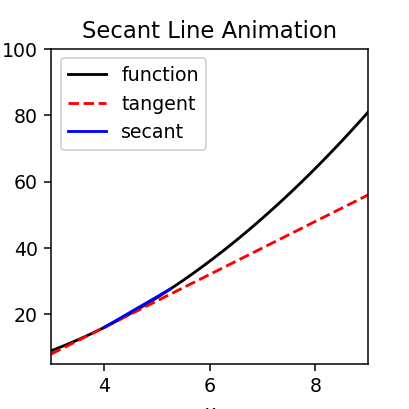

<IPython.core.display.Javascript object>


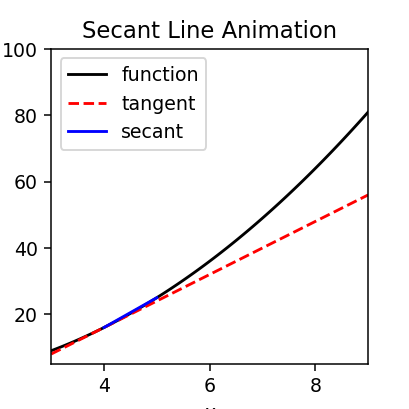

In [4]:
# i) import functions 

import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
%matplotlib notebook

# ii) specify the number of frames 
frames=5  

# iii) specify the function f(x) and poit of tangency
f = lambda x : x**2
a=4   #x coordinate of point of tangency

# iv) use a for loop to create the individual frames
for n in range(frames):
    fig = plt.figure(figsize=(3,3))
    plt.xlim(3,9)
    plt.ylim(5,100)
    #---plot the function f(x) in black---
    x = np.linspace(3, 9, 100)
    y=f(x)
    plt.plot(x,y,color='k')
    #---plot the tangent line in red---
    y_tan= f(a)+2*a*(x-a)
    plt.plot(x,y_tan,'r--') 
    #---plot the secant segment in blue---
    b=a+5/(n+1)
    x_sec=np.linspace(a, b, 50)
    y_sec= f(a) + (f(b) - f(a)) / (b - a) * (x_sec - a)
    plt.plot(x_sec,y_sec,color='b')
    # Set the x-axis and y-axis labels
    plt.xlabel('x')
    plt.ylabel('y')

    # Set the title
    plt.title('Secant Line Animation')

    # Set the legend
    plt.legend(['function','tangent','secant'])
    plt.savefig(str(n)+'.png')
    plt.show()
    
# v) combine the frames into an animation file secant.gif
from PIL import Image
images = []
for n in range(frames):
    exec('a'+str(n)+'=Image.open("'+str(n)+'.png")')
    images.append(eval('a'+str(n)))
images[0].save('secant.gif',
               save_all=True,
               append_images=images[1:],
               duration=1000,
               loop=0)

### Exercise

:::{admonition} Exercise
**1.1**
Create an animation with 3 frames which shows secants approaching the tangent line to $y=\frac{1}{x}$ at $x=1$.
:::

```{index} Riemann Sum
```

## Riemann Sums

Just as the tangent line is obtained by a limiting process, the area under curve is obtainable as a limit of a Riemann Sum. We can create an animation which shows the approximating rectangles filling in the area under a curve. For example, we consider the area under $y=1/x$ in the interval $1\le x \le 5$.

<img src="riemannsums.gif" width="700" align="center">

<IPython.core.display.Javascript object>


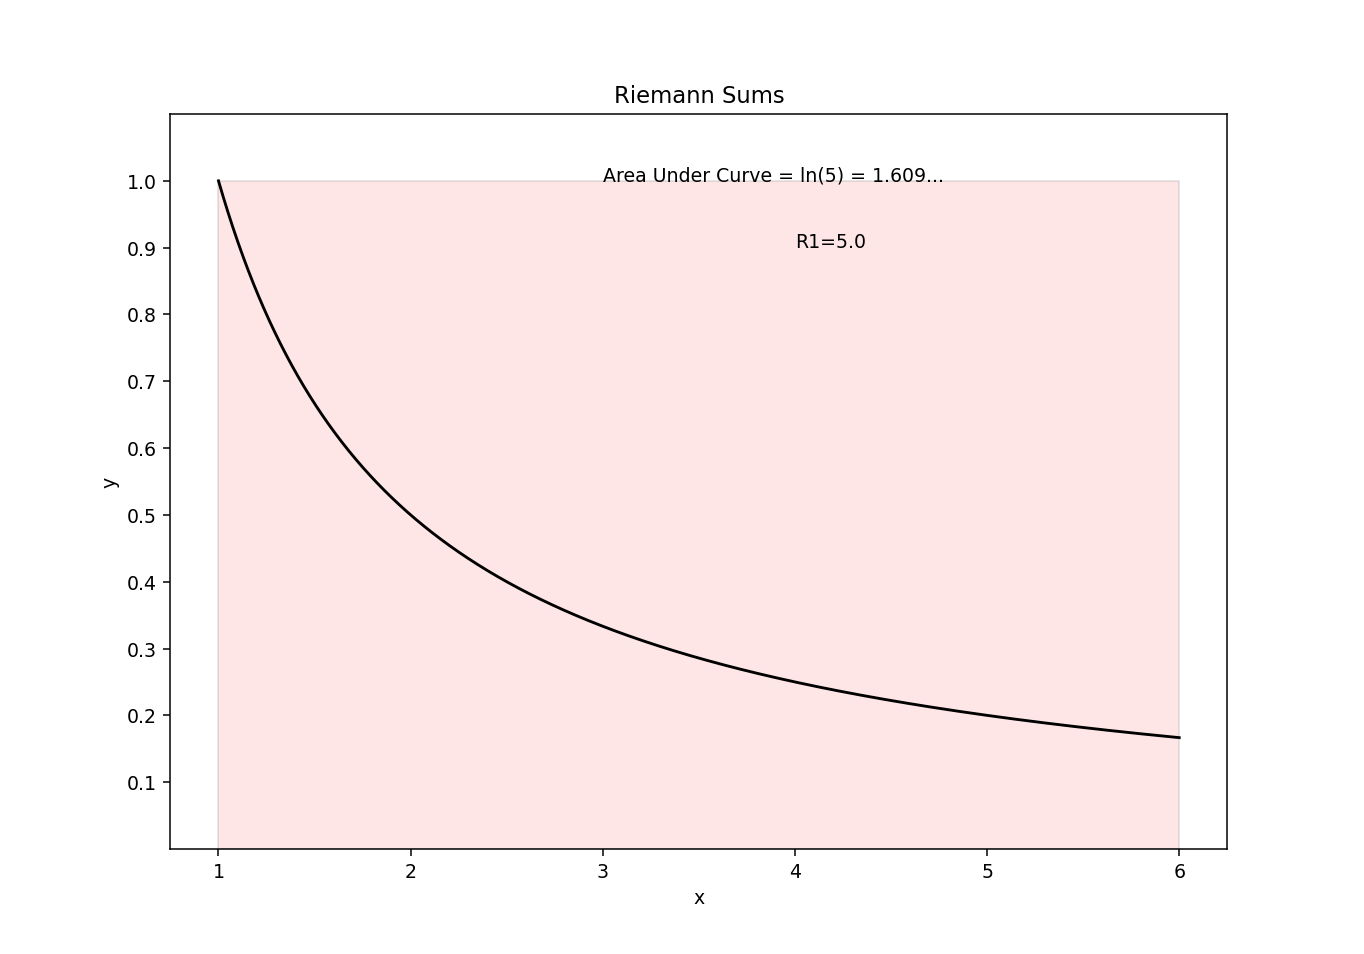

<IPython.core.display.Javascript object>


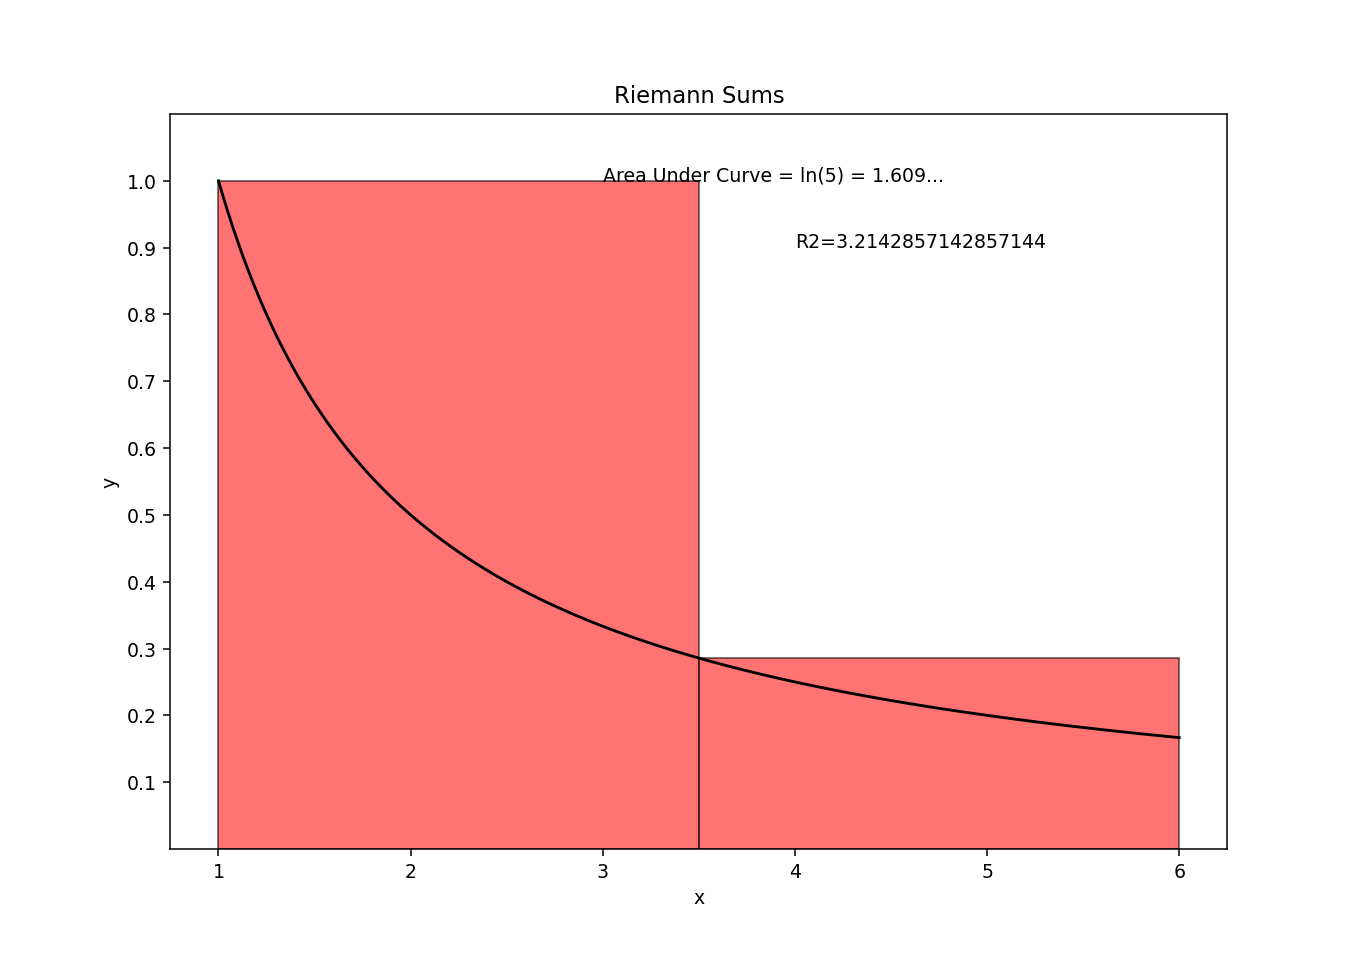

<IPython.core.display.Javascript object>


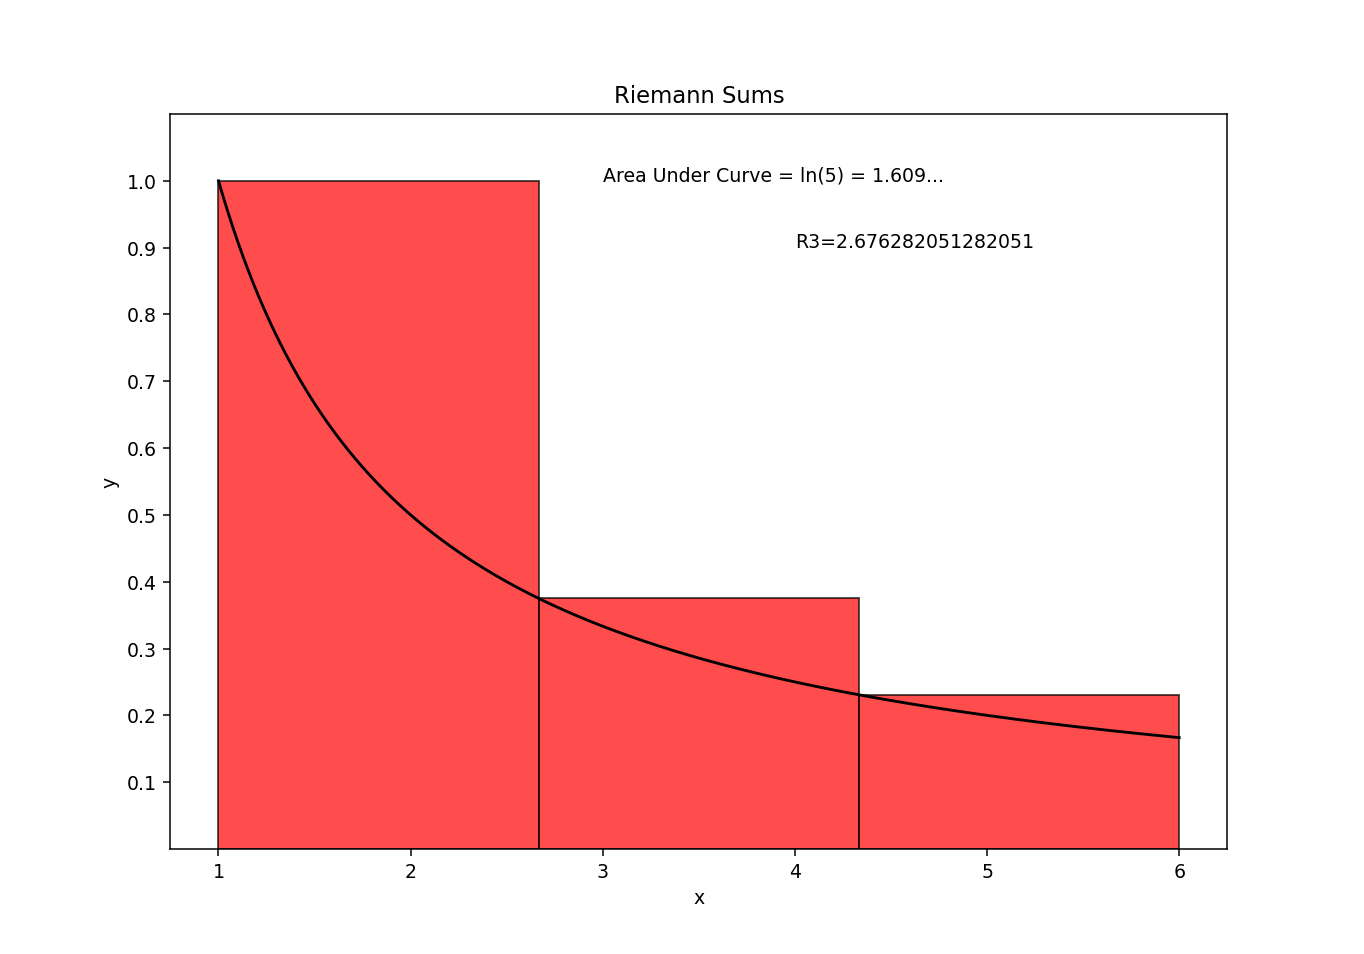

<IPython.core.display.Javascript object>


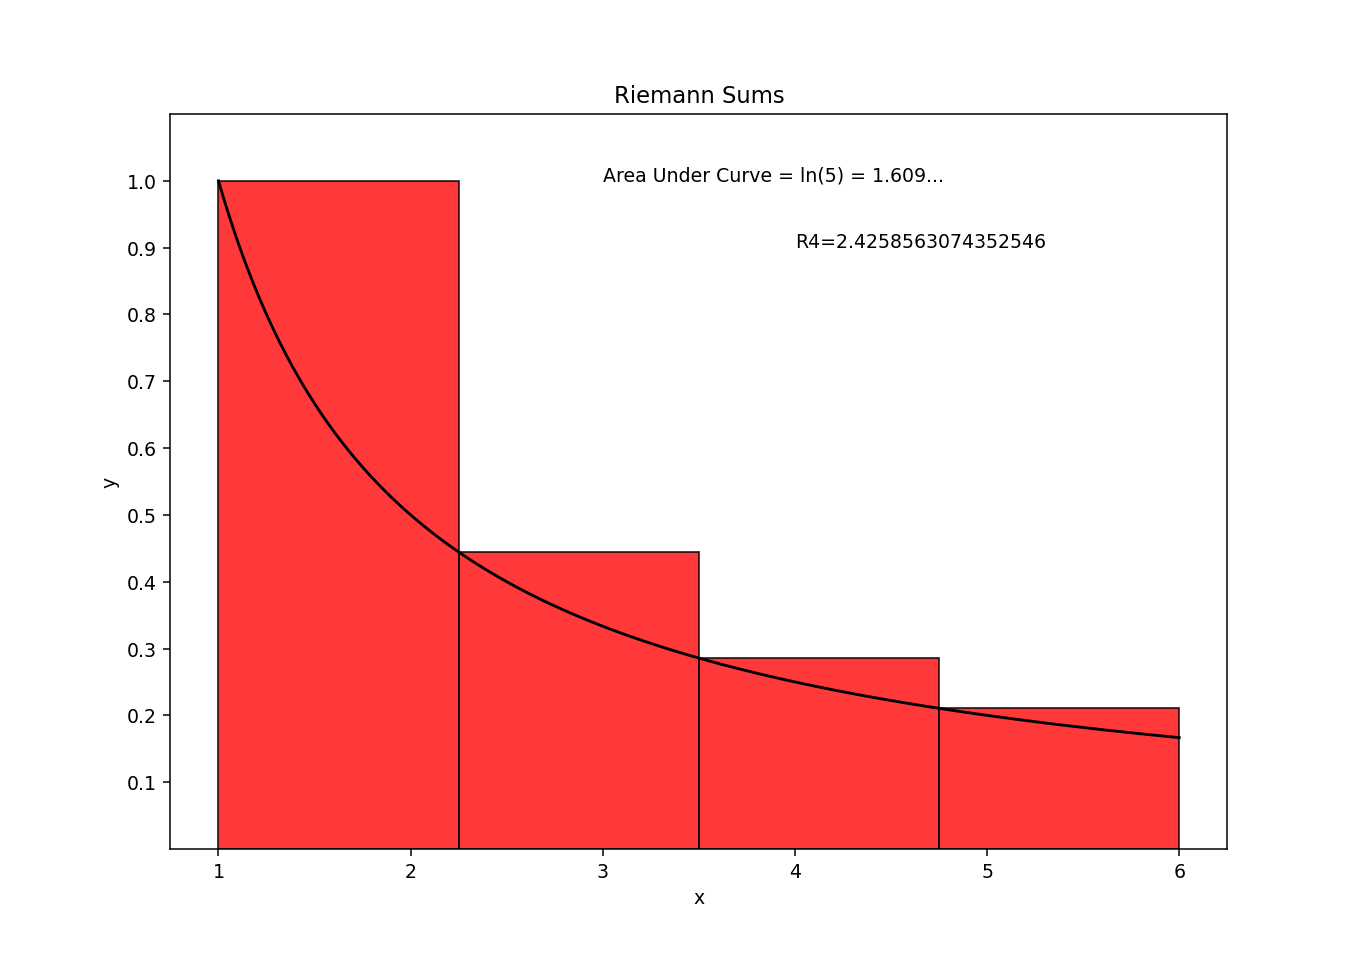

<IPython.core.display.Javascript object>


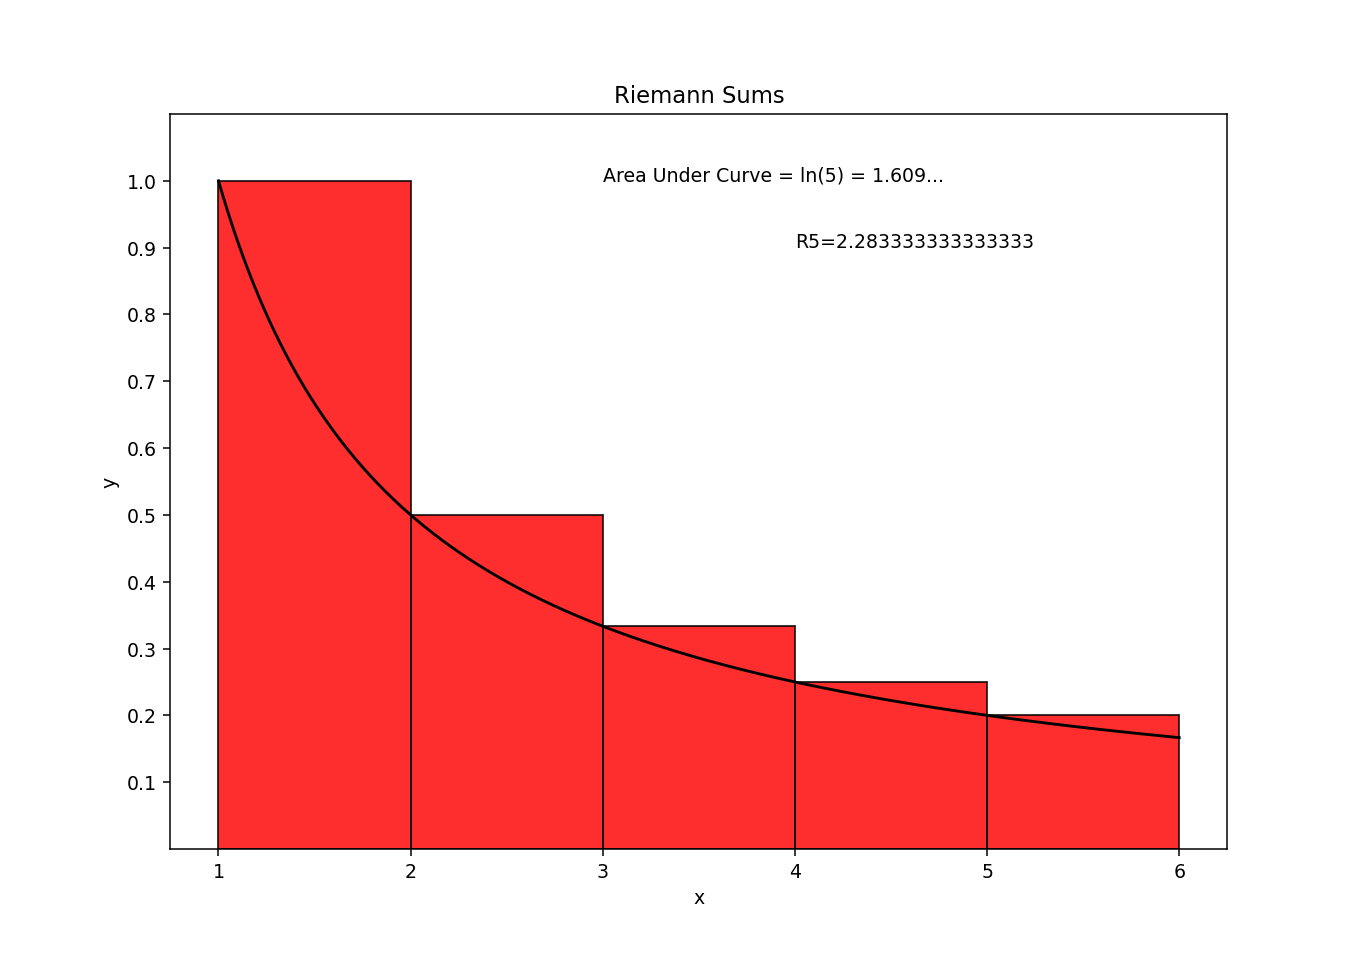

<IPython.core.display.Javascript object>


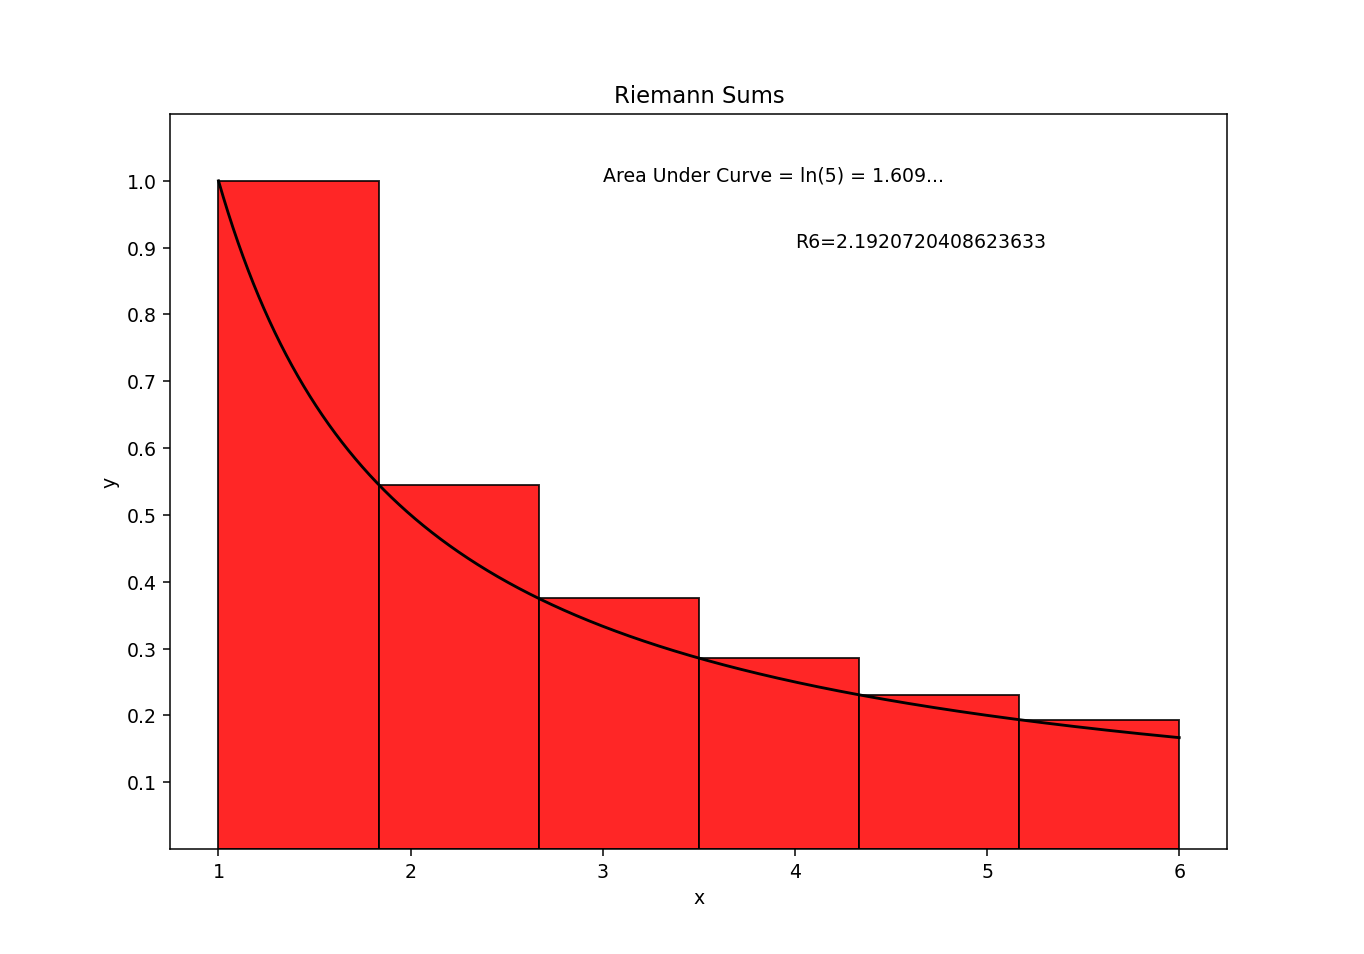

<IPython.core.display.Javascript object>


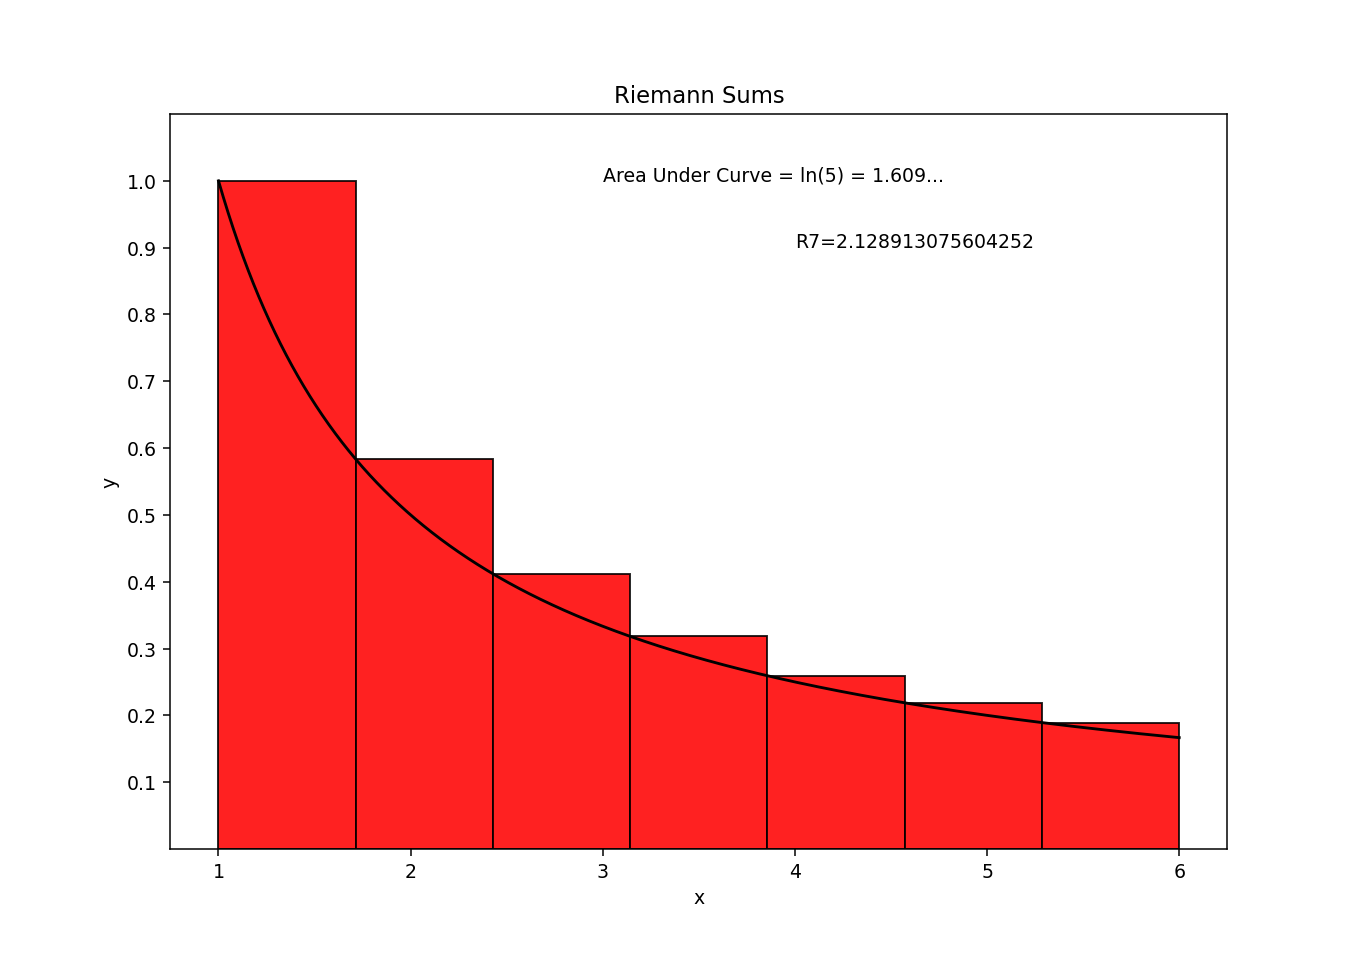

<IPython.core.display.Javascript object>


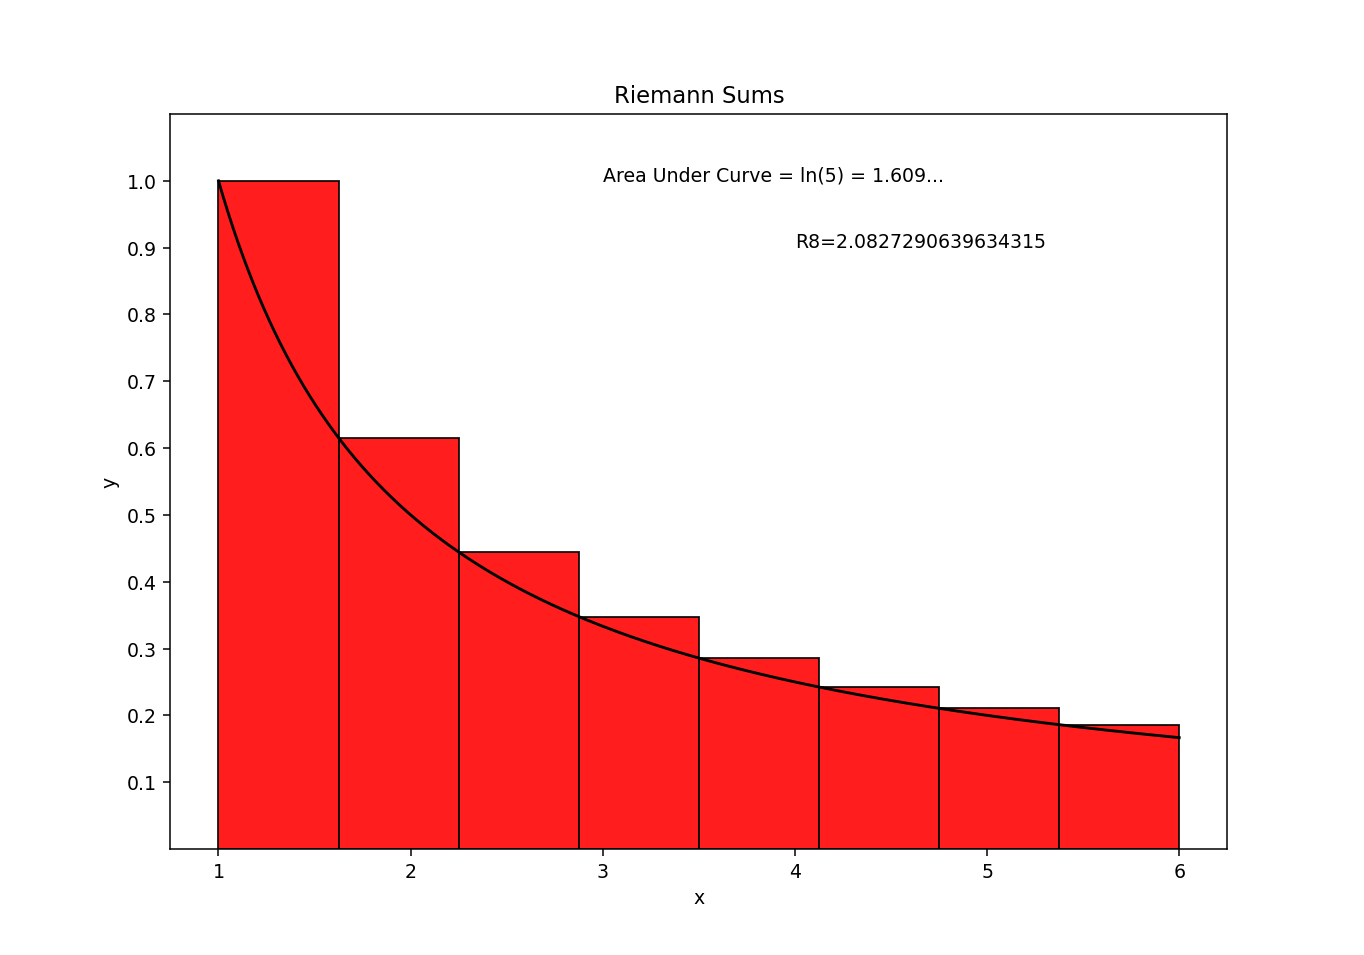

<IPython.core.display.Javascript object>


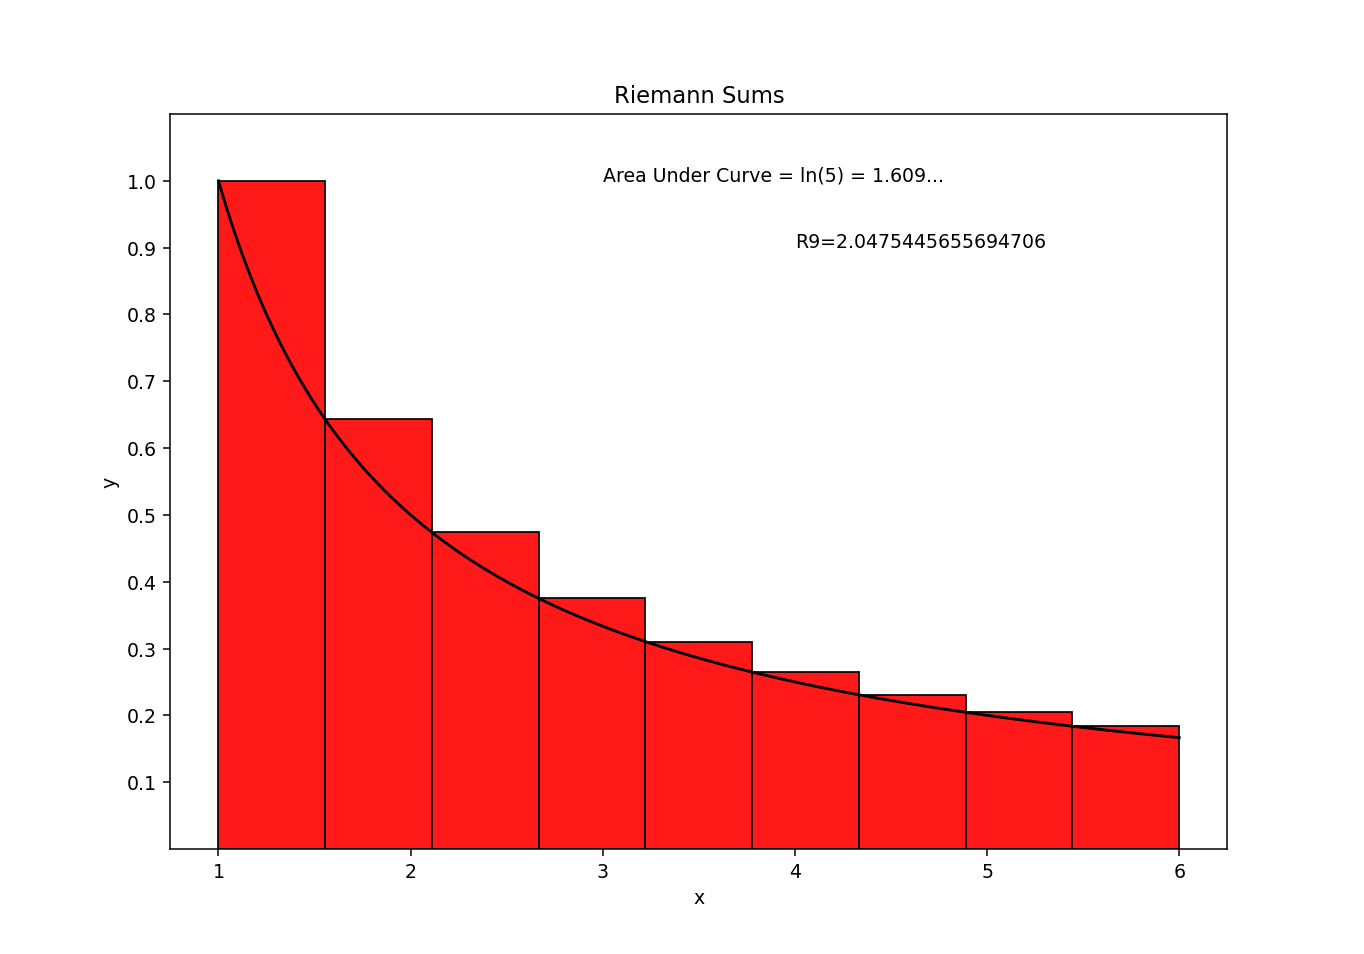

<IPython.core.display.Javascript object>


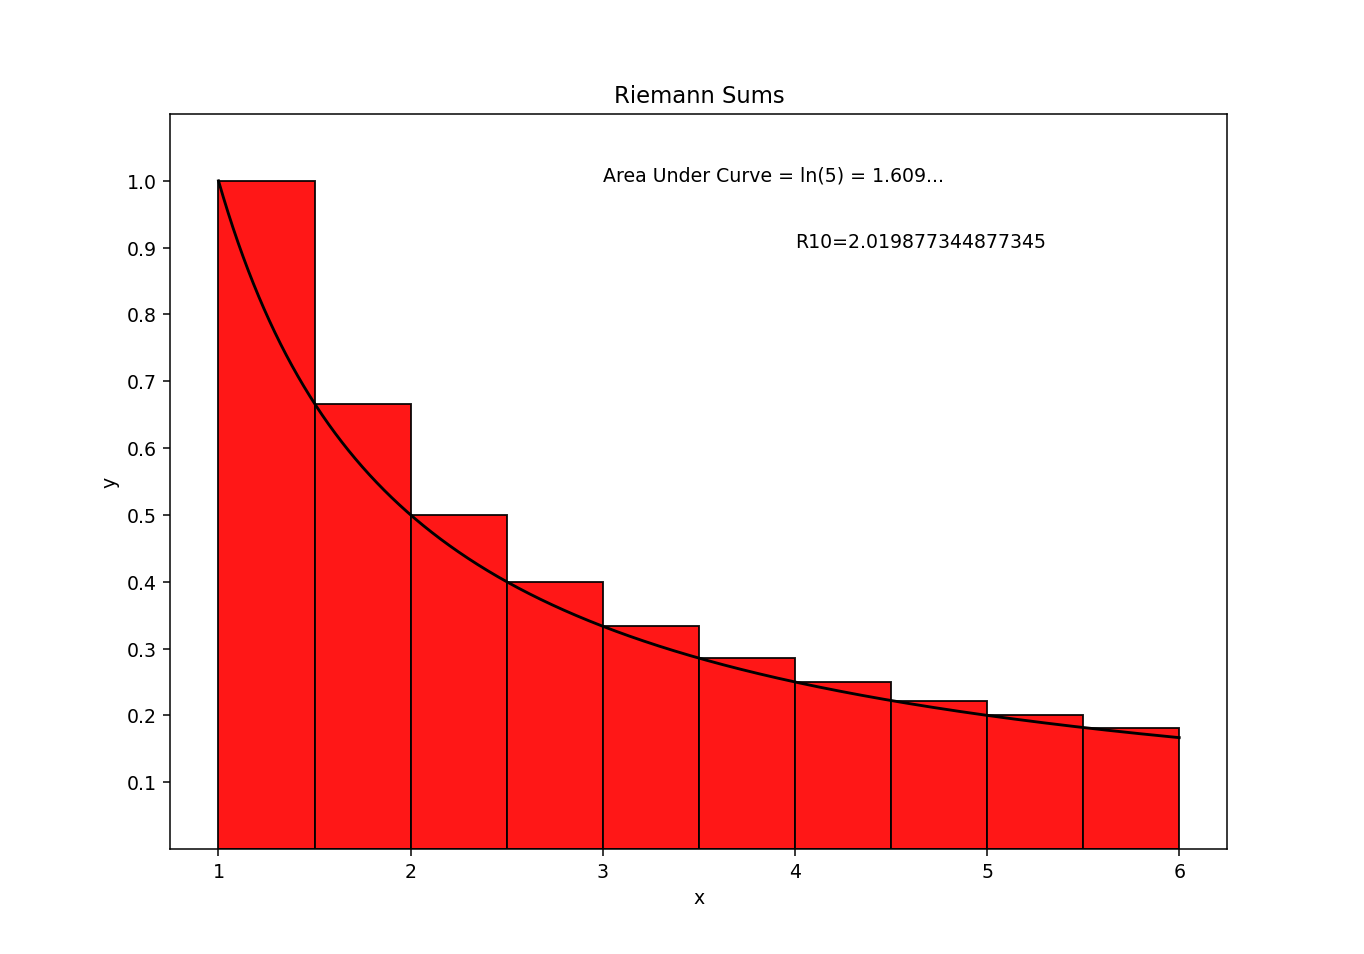

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
%matplotlib notebook
f = lambda x : 1/x
x=np.arange(1,6,.0001)
y=f(x)
frames=10
for n in np.arange(0,frames,1):
    plt.figure(figsize=(10,7))
    plt.gca().set_xticks(np.arange(1,7,1))
    plt.gca().set_yticks([.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
    plt.plot(x,y,'k',markersize=1)
    x_left = np.linspace(1,6,n+2)
    x_left=x_left[:-1]
    plt.bar(x_left,1/x_left,width=5/(n+1),alpha=1-.9*(1/(n+1)),align='edge',color='r',edgecolor='k')
    plt.title('Riemann Sums')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.ylim((0,1.1)) 
    plt.text(3,1,"Area Under Curve = ln(5) = 1.609...")
    Rn=0
    for k in np.arange(0,n+1,1):
        Rn=Rn+(5/(n+1))*(1/x_left[k])      
    plt.text(4,.9, "R"+str(n+1)+"="+str(Rn))
    #plt.grid()
    plt.savefig(str(n)+'.png')
    plt.show()
#----- Save the Animation as riemannsums.gif
from PIL import Image
images = []
for n in range(frames):
    exec('a'+str(n)+'=Image.open("'+str(n)+'.png")')
    images.append(eval('a'+str(n)))
images[0].save('riemannsums.gif',
               save_all=True,
               append_images=images[1:],
               duration=800,
               loop=0)

### Exercise

:::{admonition} Exercise
**2.1**
Create an animation for a Riemann sum approximation of $\int_0^{\pi/2}\cos(x)\,dx$.
:::

```{index} parametric curves
```

## Parametric Curves

```{index} cycloid
```

JNBs can be used to create  .gif animations of parametric curves. For example, the code below is used to animate a cycloid curve traced by a point on the rim of a wheel.

<img src="cycloid.gif" width="800" align="center">

<IPython.core.display.Javascript object>


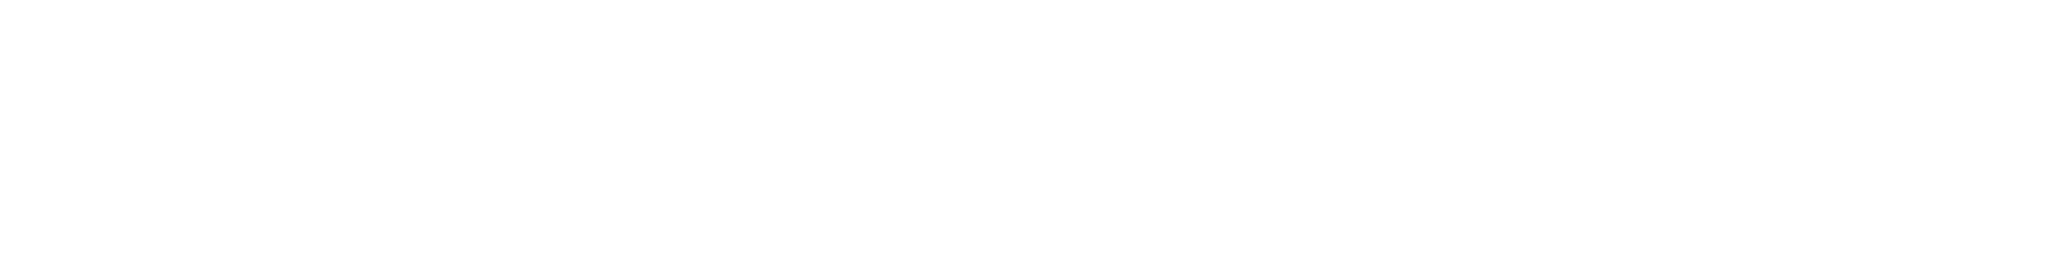

<IPython.core.display.Javascript object>


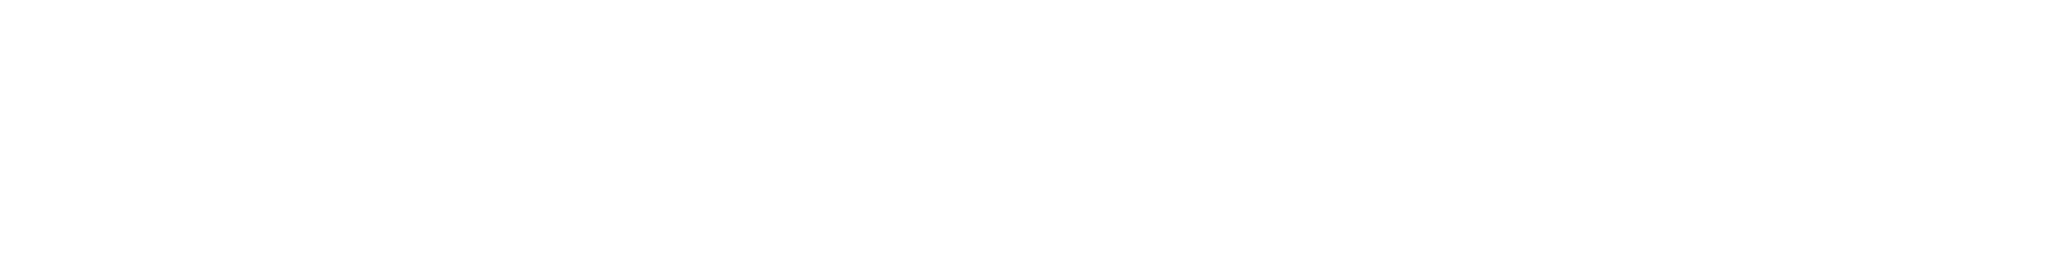

<IPython.core.display.Javascript object>


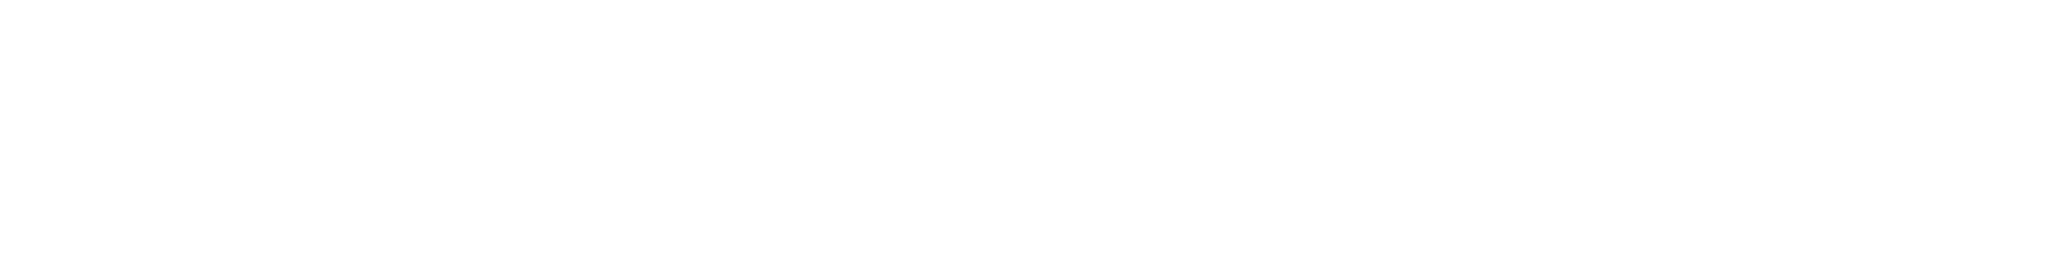

<IPython.core.display.Javascript object>


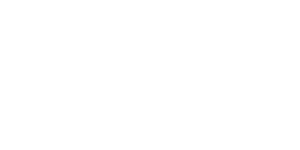

<IPython.core.display.Javascript object>


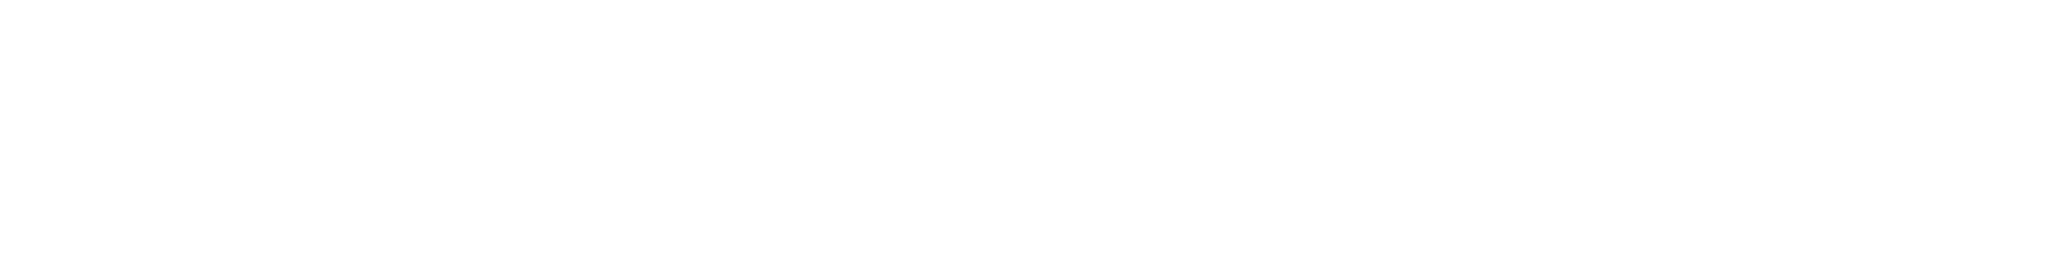

<IPython.core.display.Javascript object>


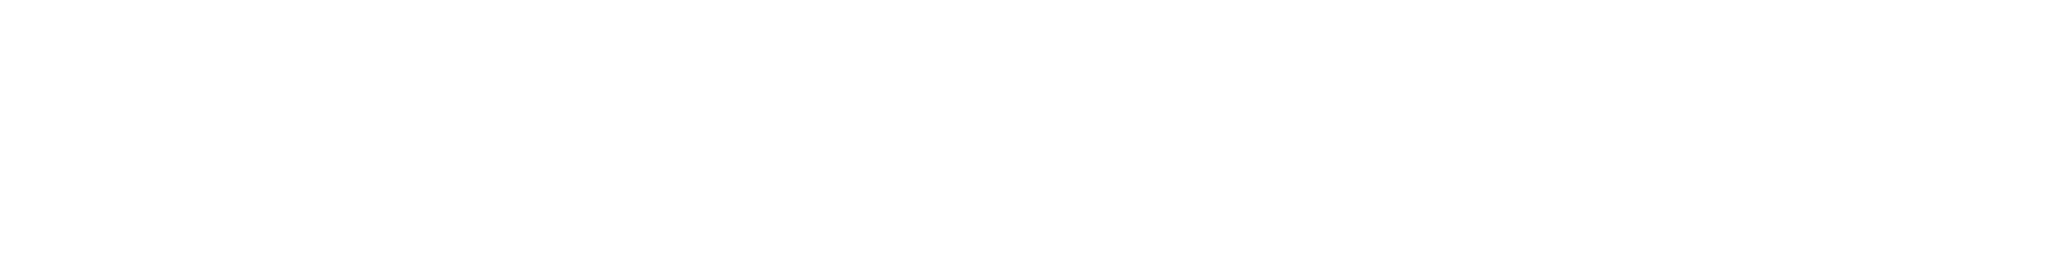

<IPython.core.display.Javascript object>


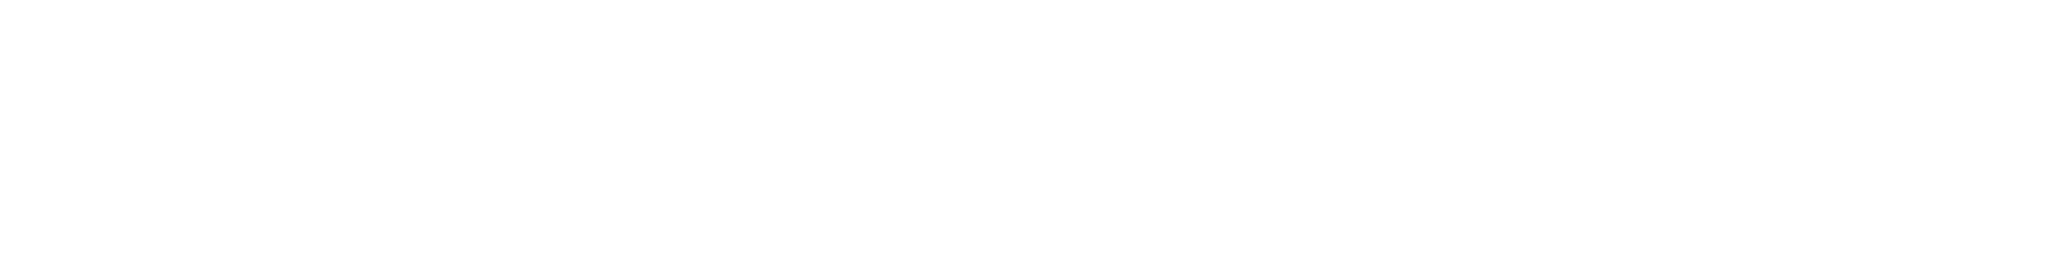

<IPython.core.display.Javascript object>


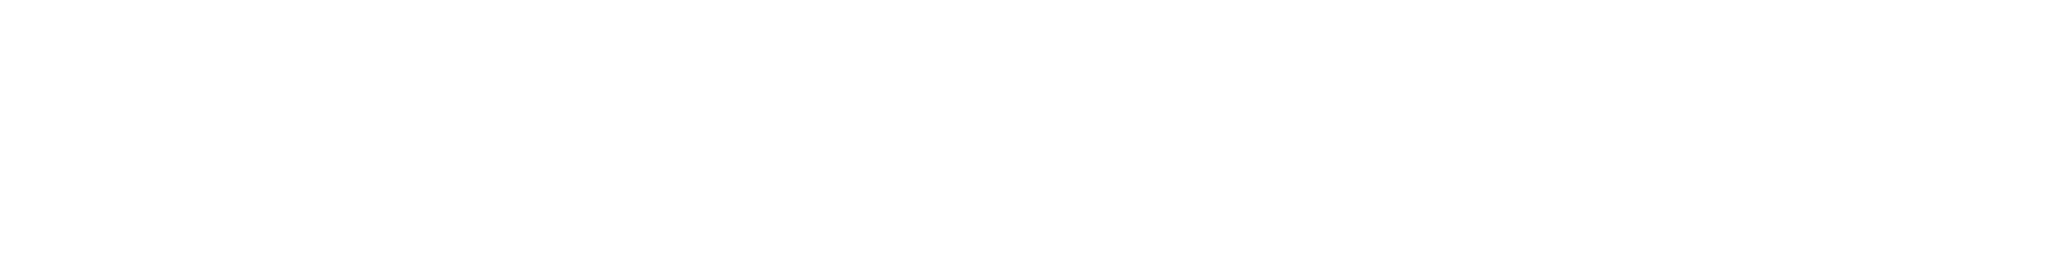

<IPython.core.display.Javascript object>


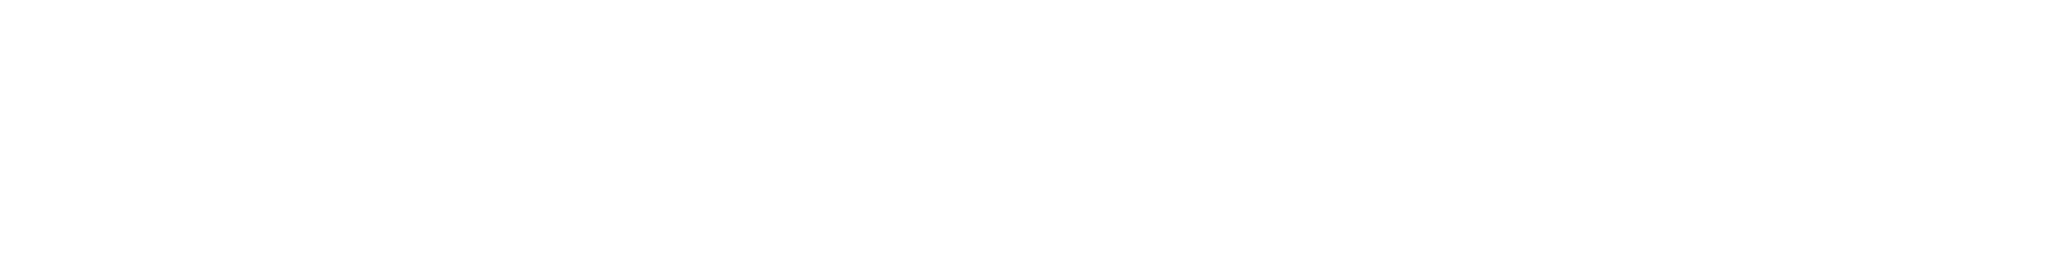

<IPython.core.display.Javascript object>


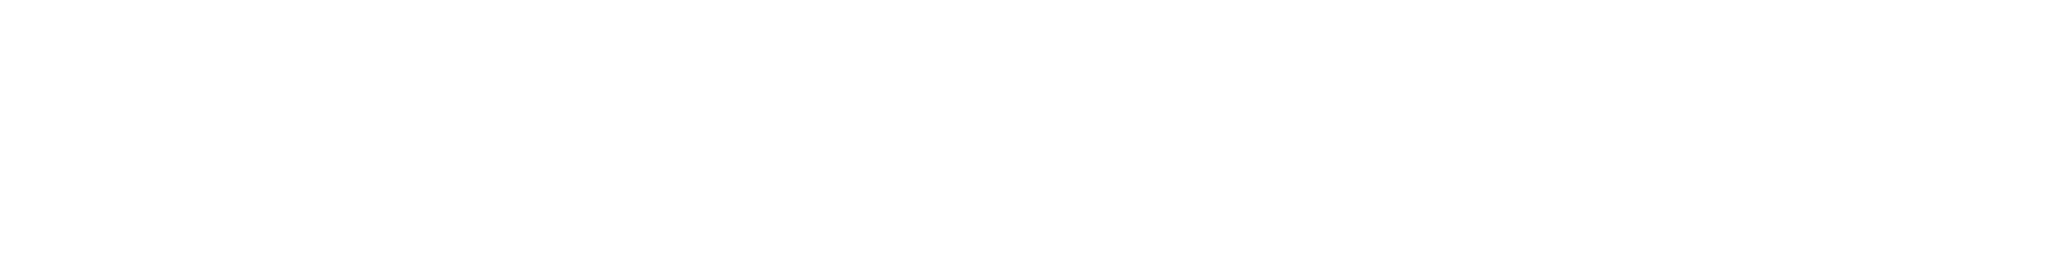

<IPython.core.display.Javascript object>


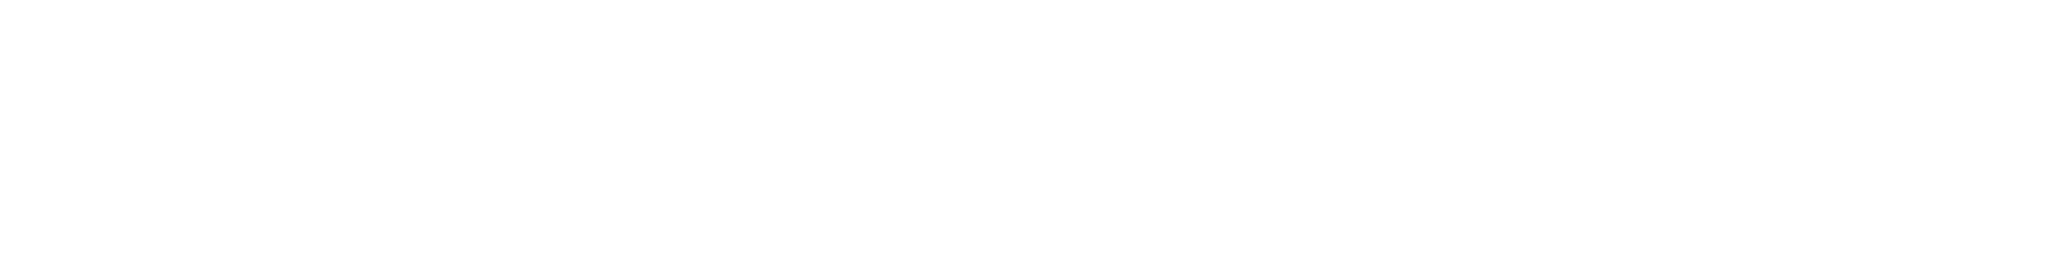

<IPython.core.display.Javascript object>


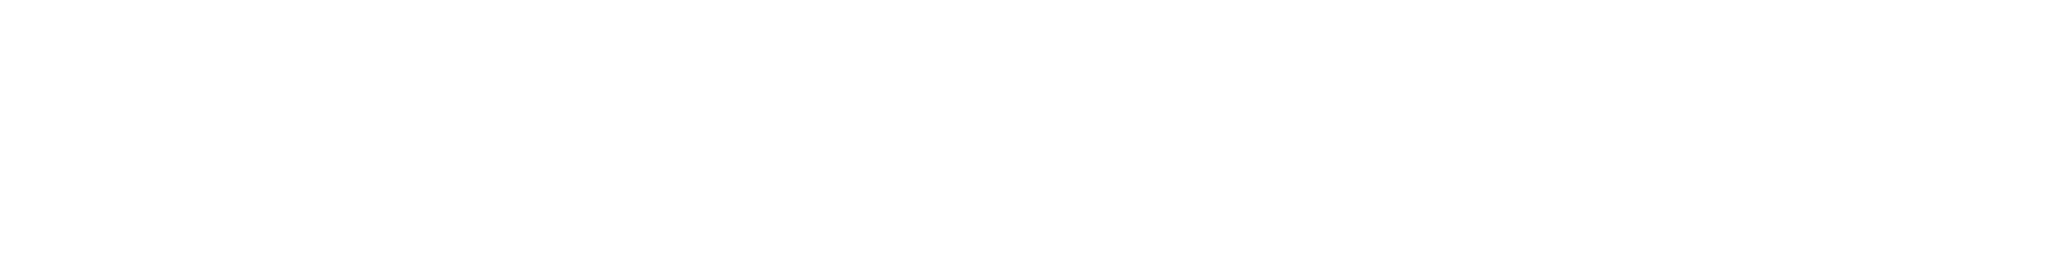

<IPython.core.display.Javascript object>


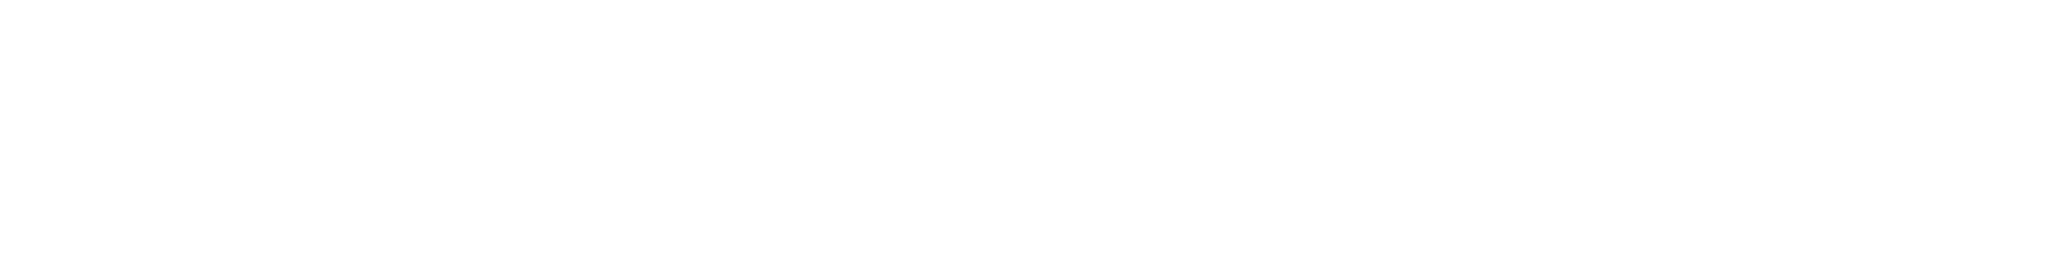

<IPython.core.display.Javascript object>


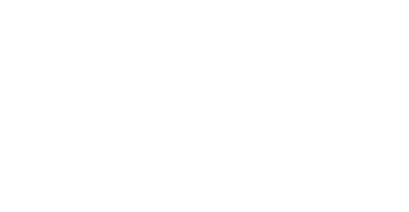

<IPython.core.display.Javascript object>


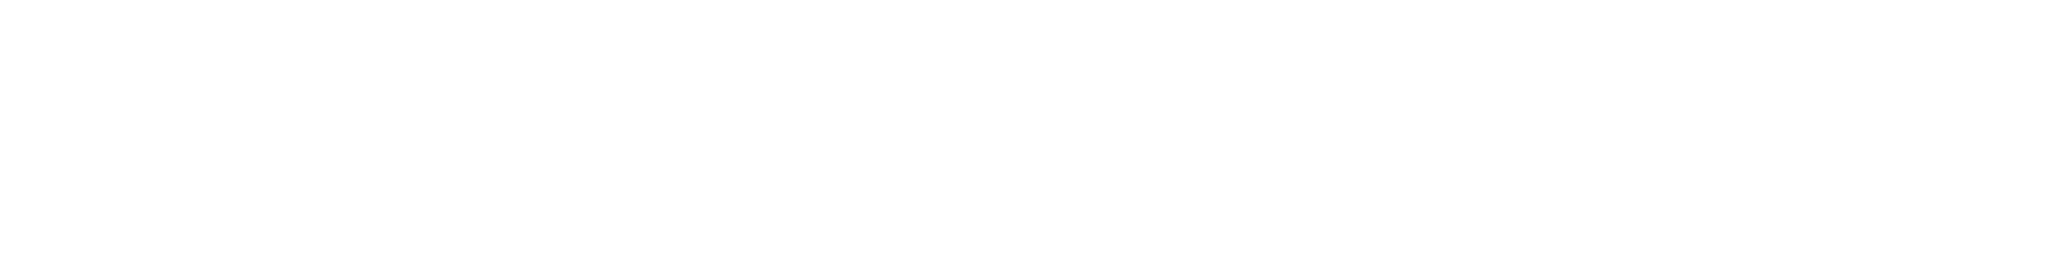

<IPython.core.display.Javascript object>


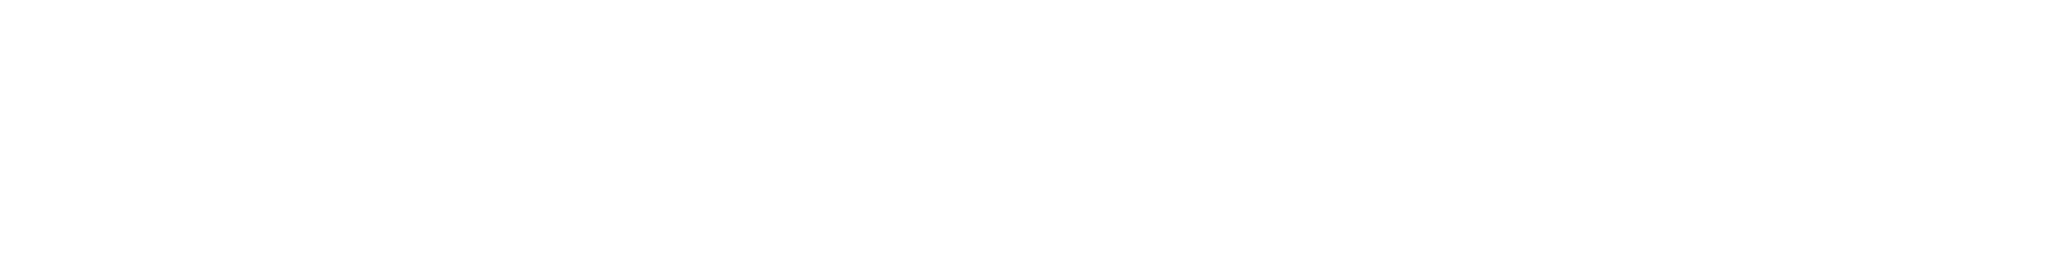

<IPython.core.display.Javascript object>


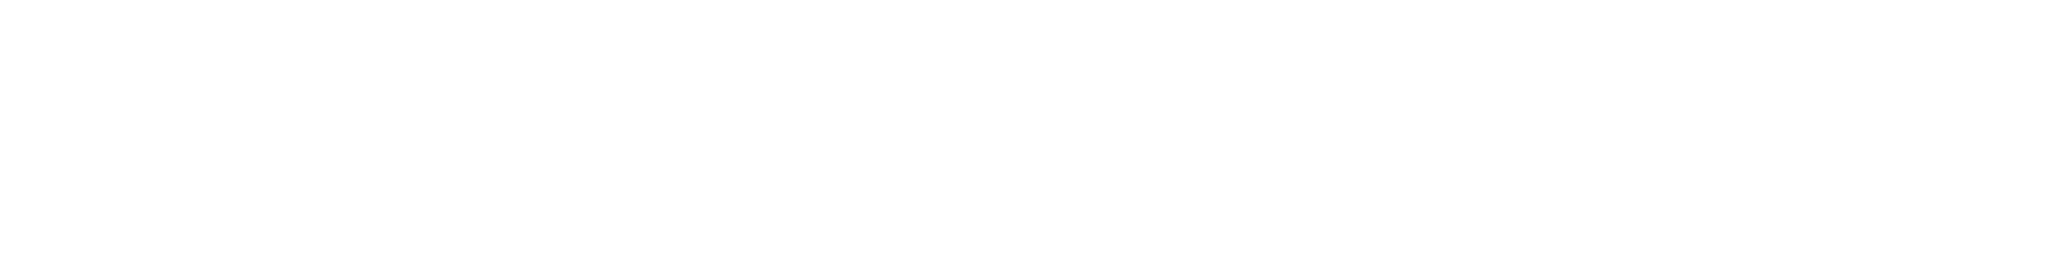

<IPython.core.display.Javascript object>


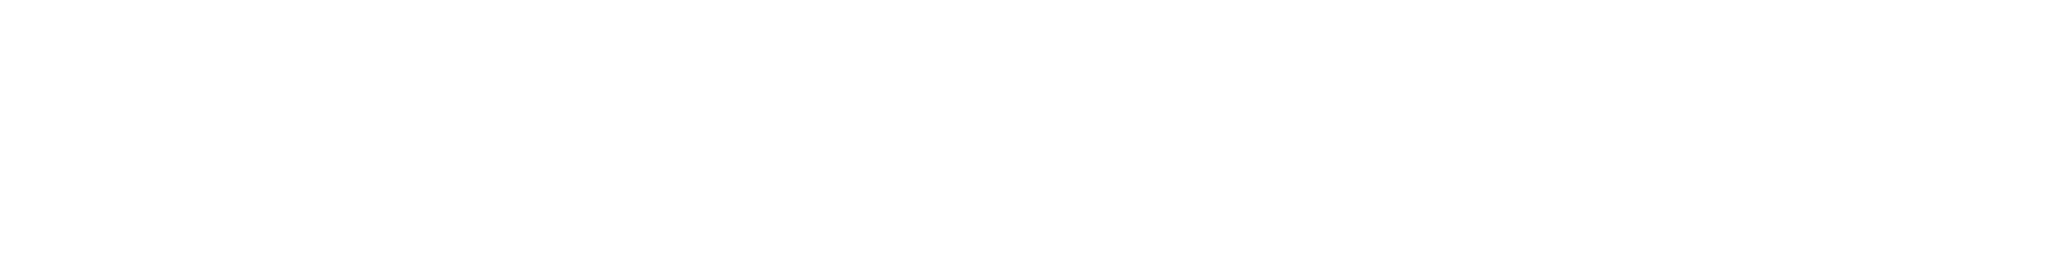

<IPython.core.display.Javascript object>


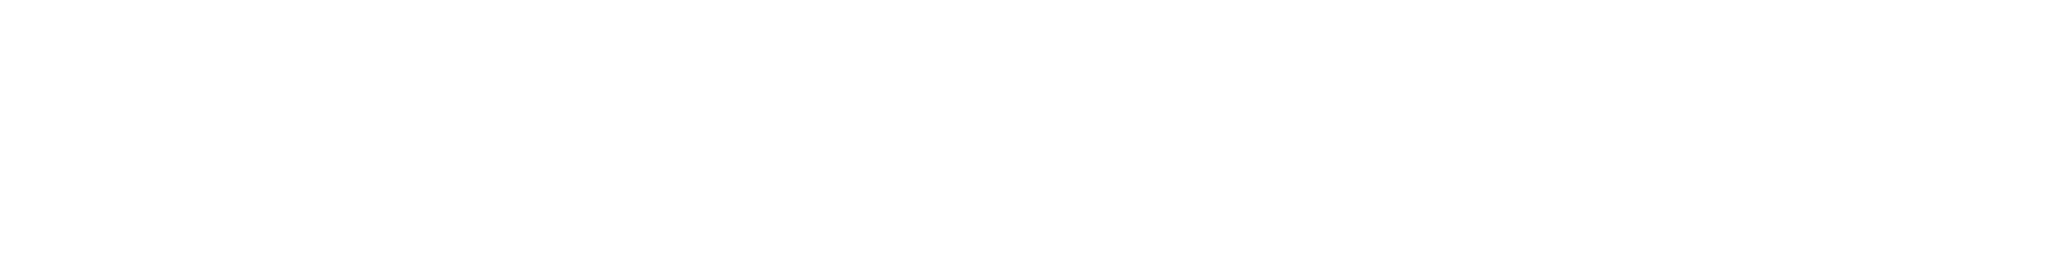

<IPython.core.display.Javascript object>


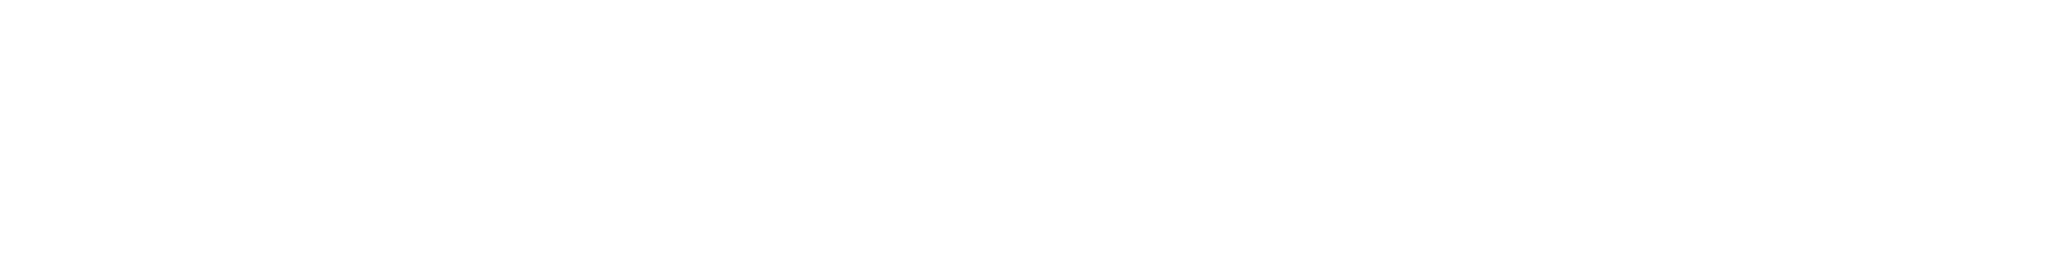

<IPython.core.display.Javascript object>


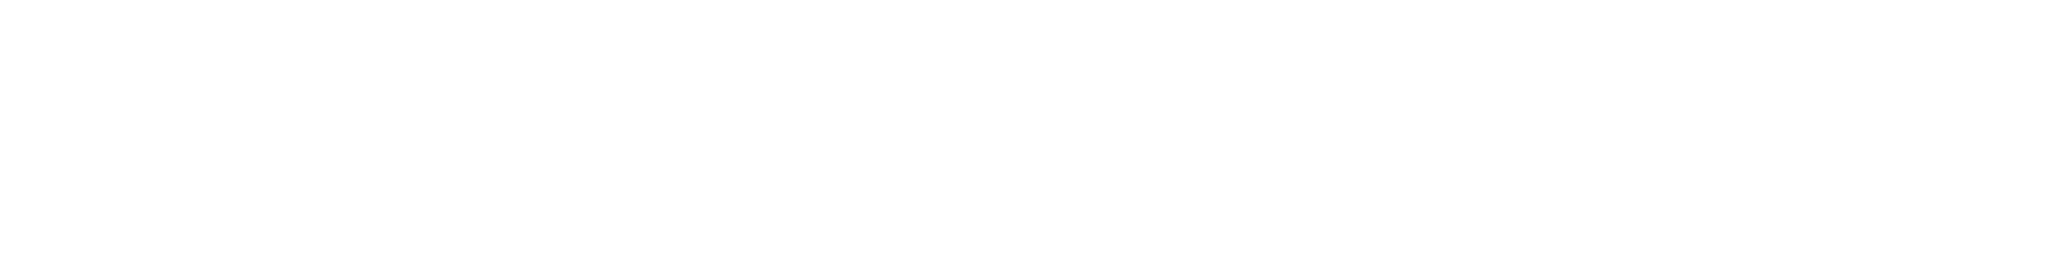

<IPython.core.display.Javascript object>


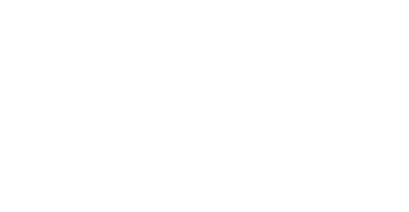

<IPython.core.display.Javascript object>


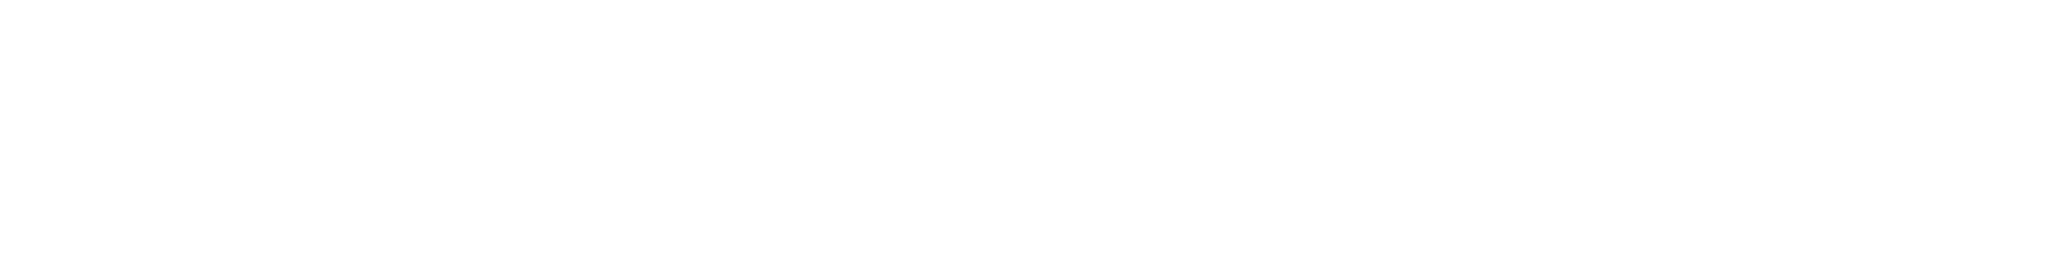

<IPython.core.display.Javascript object>


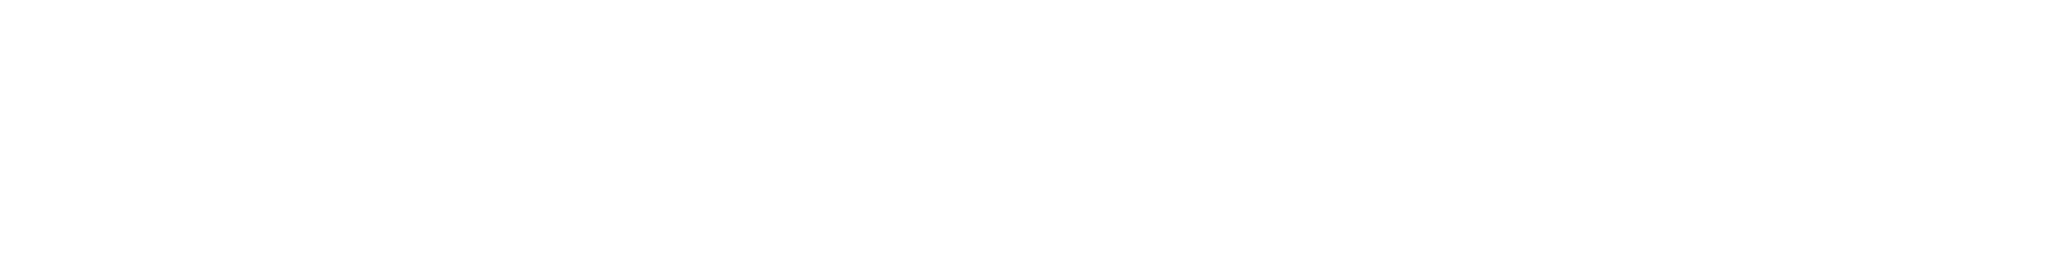

<IPython.core.display.Javascript object>


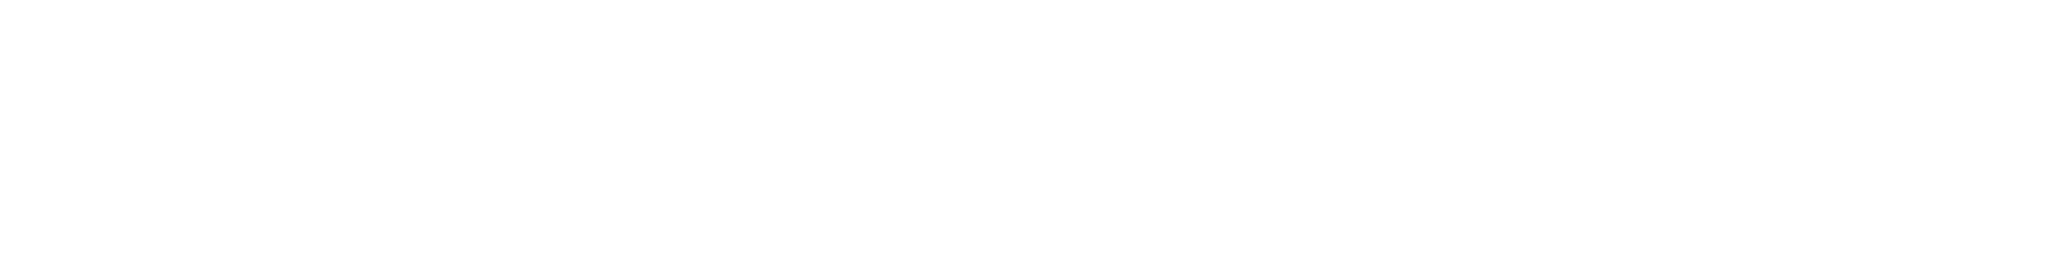

<IPython.core.display.Javascript object>


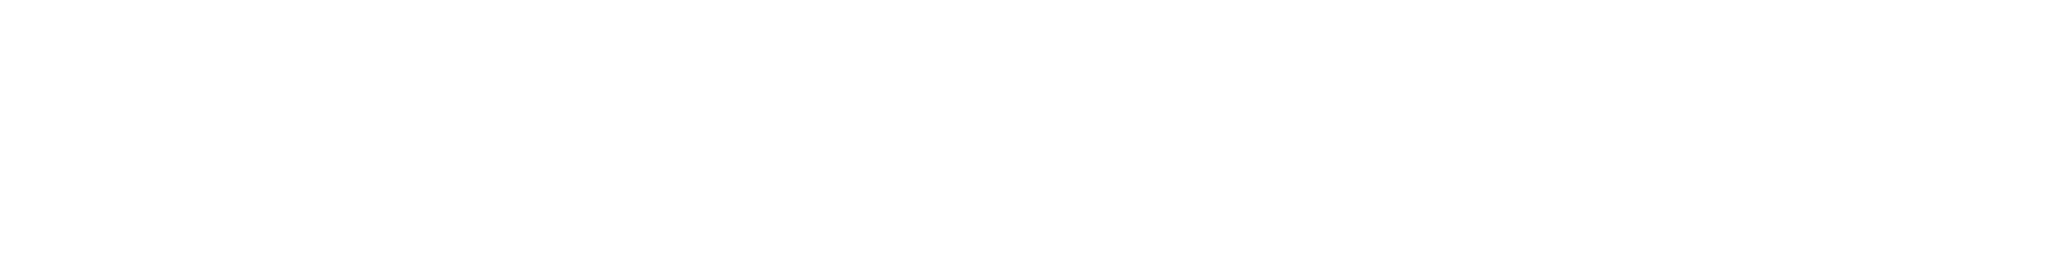

<IPython.core.display.Javascript object>


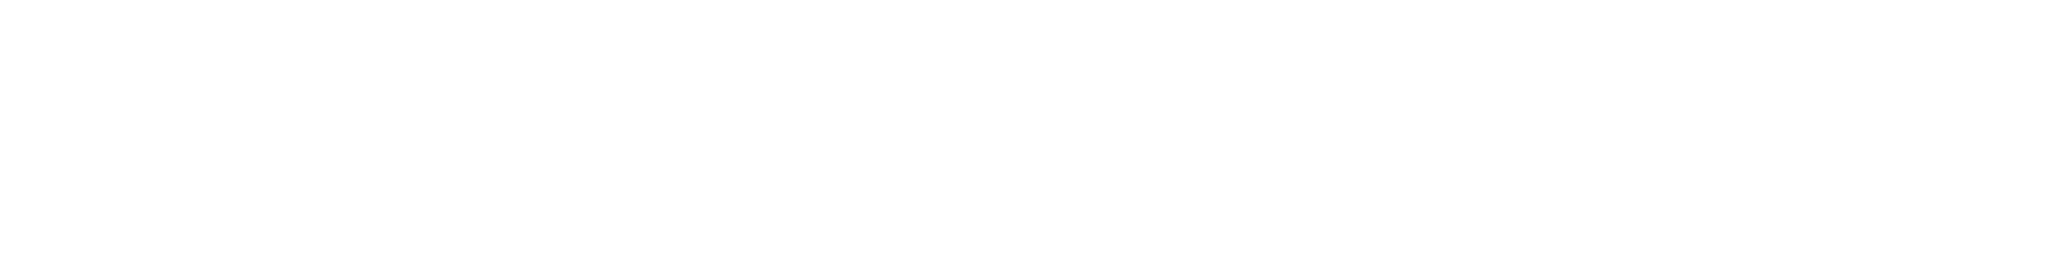

<IPython.core.display.Javascript object>


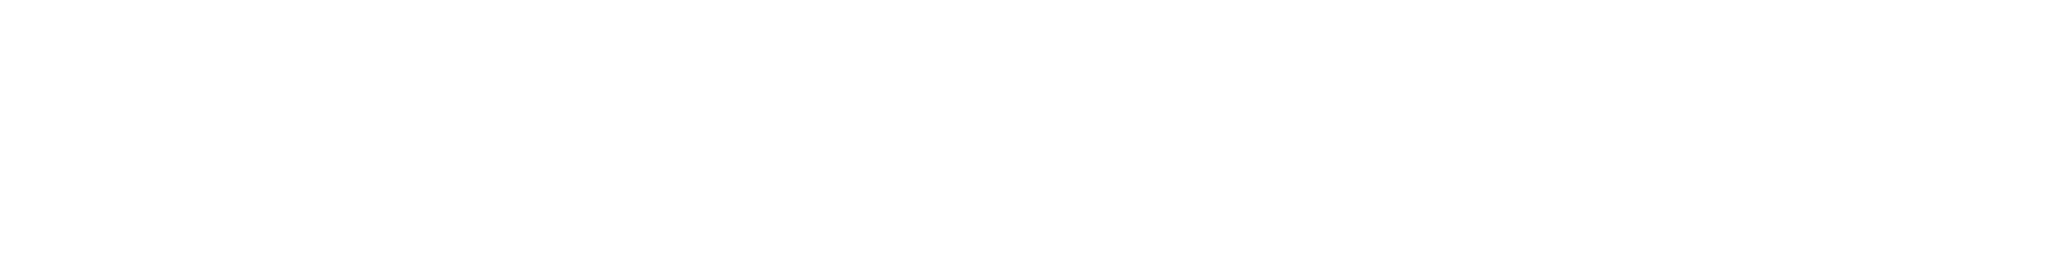

<IPython.core.display.Javascript object>


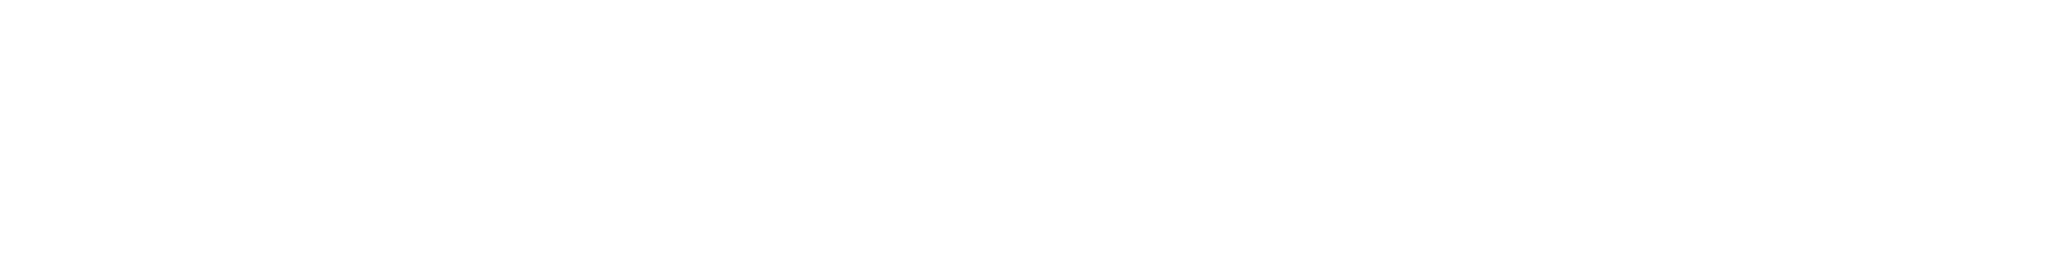

<IPython.core.display.Javascript object>


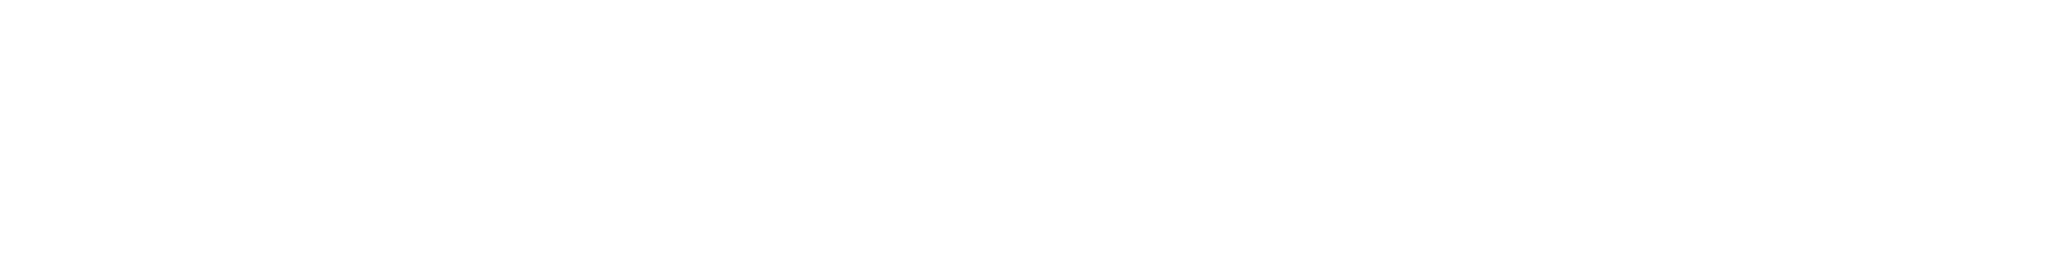

<IPython.core.display.Javascript object>


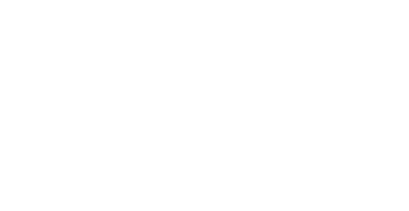

<IPython.core.display.Javascript object>


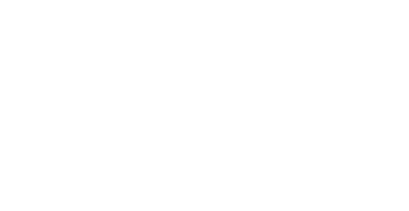

<IPython.core.display.Javascript object>


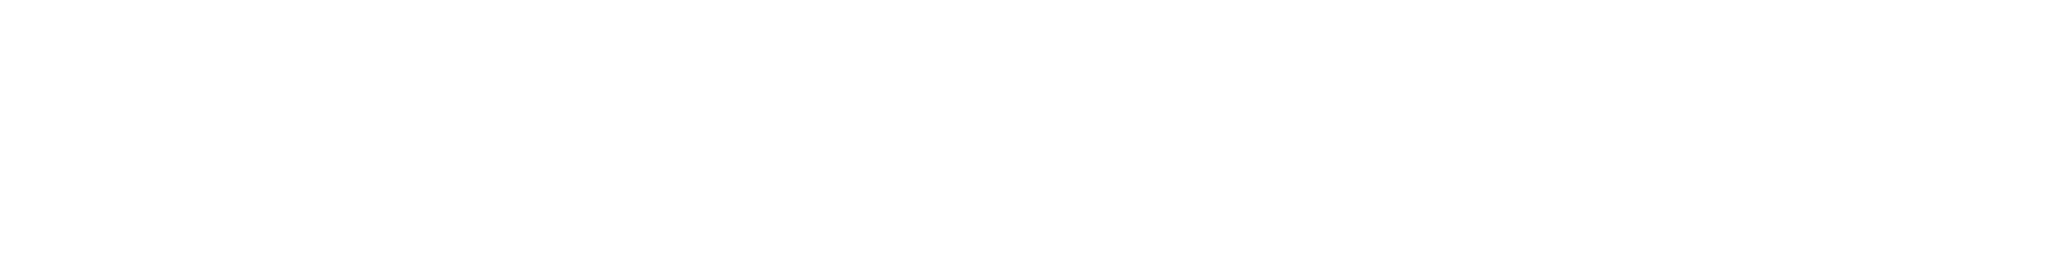

<IPython.core.display.Javascript object>


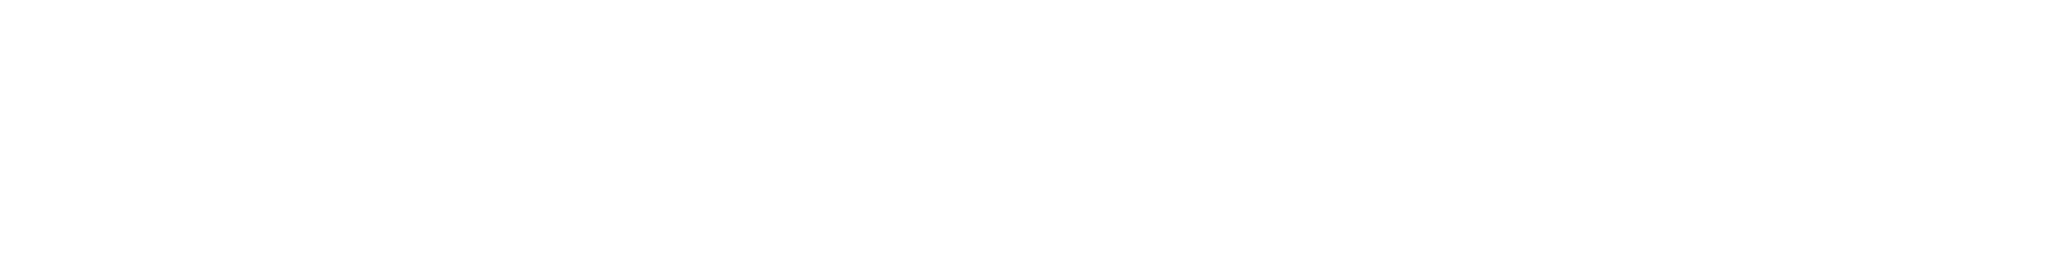

<IPython.core.display.Javascript object>


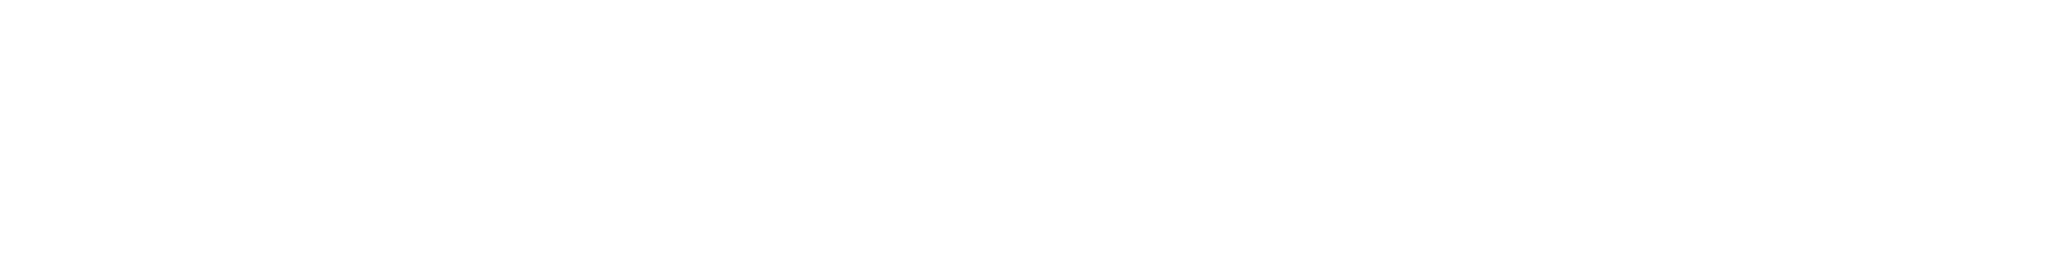

<IPython.core.display.Javascript object>


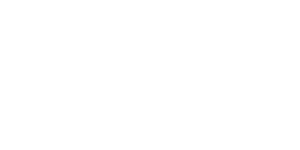

<IPython.core.display.Javascript object>


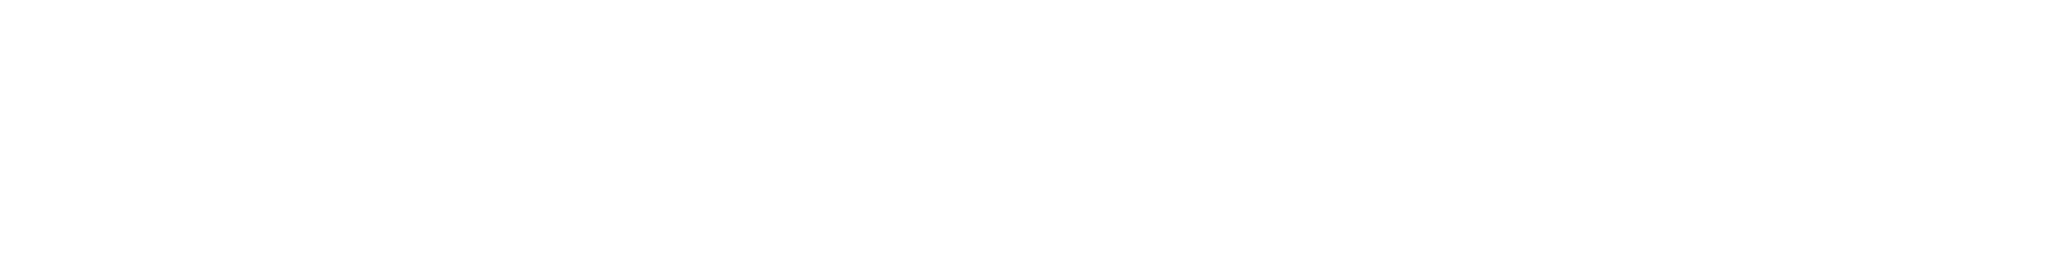

<IPython.core.display.Javascript object>


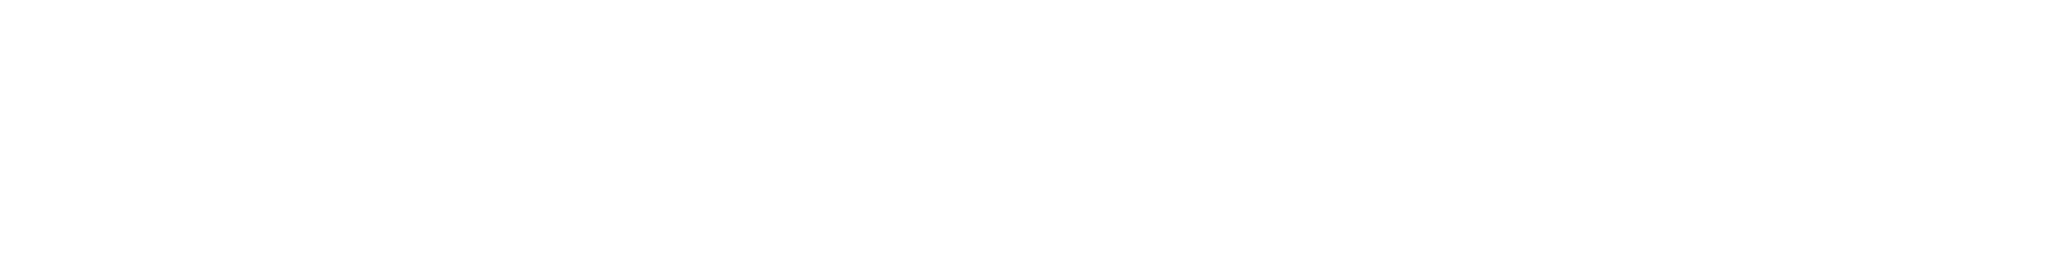

<IPython.core.display.Javascript object>


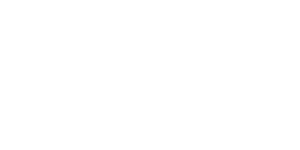

<IPython.core.display.Javascript object>


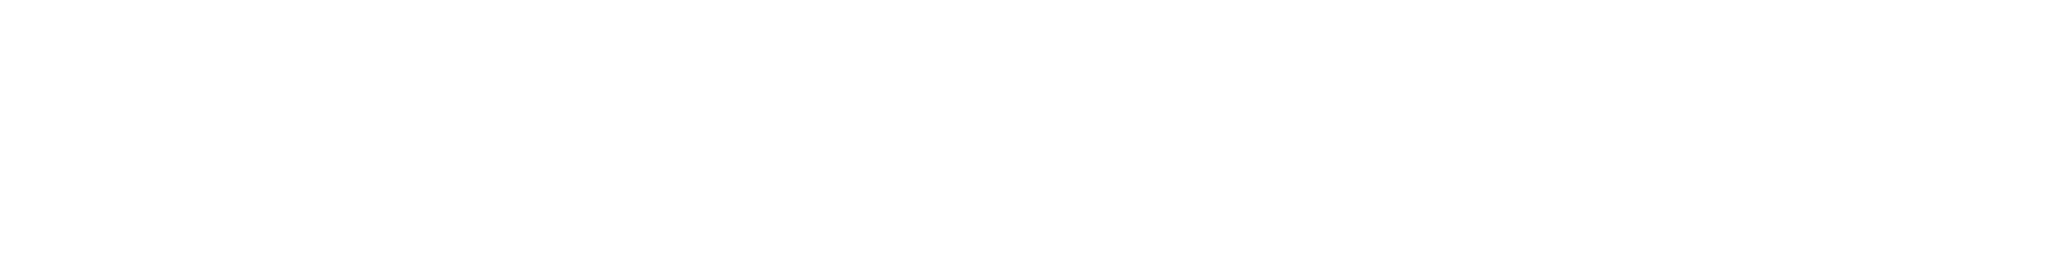

<IPython.core.display.Javascript object>


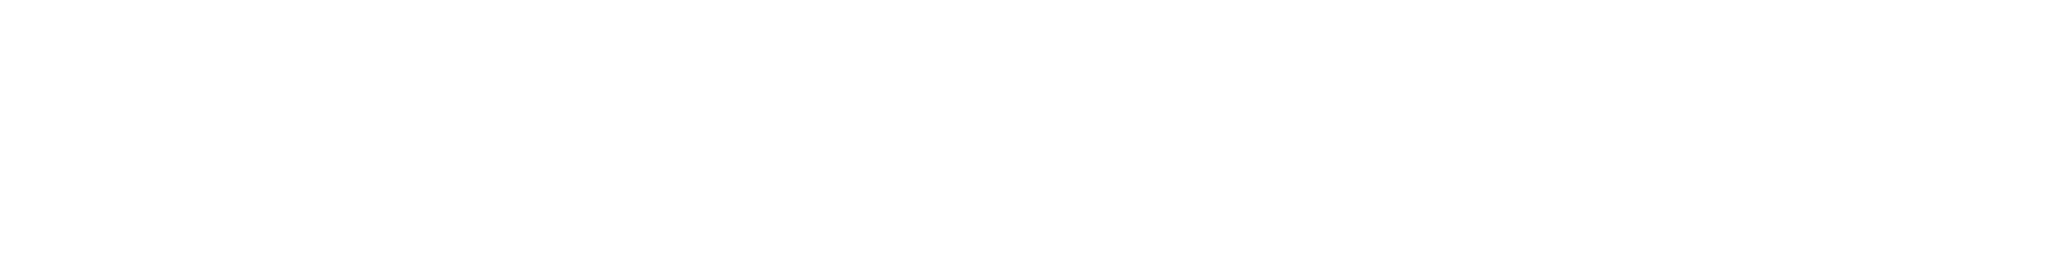

<IPython.core.display.Javascript object>


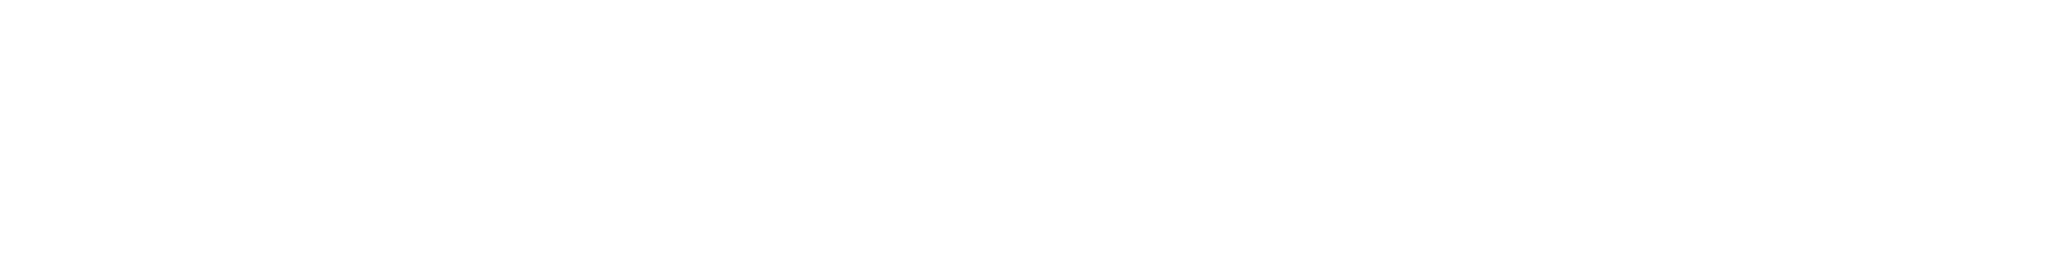

<IPython.core.display.Javascript object>


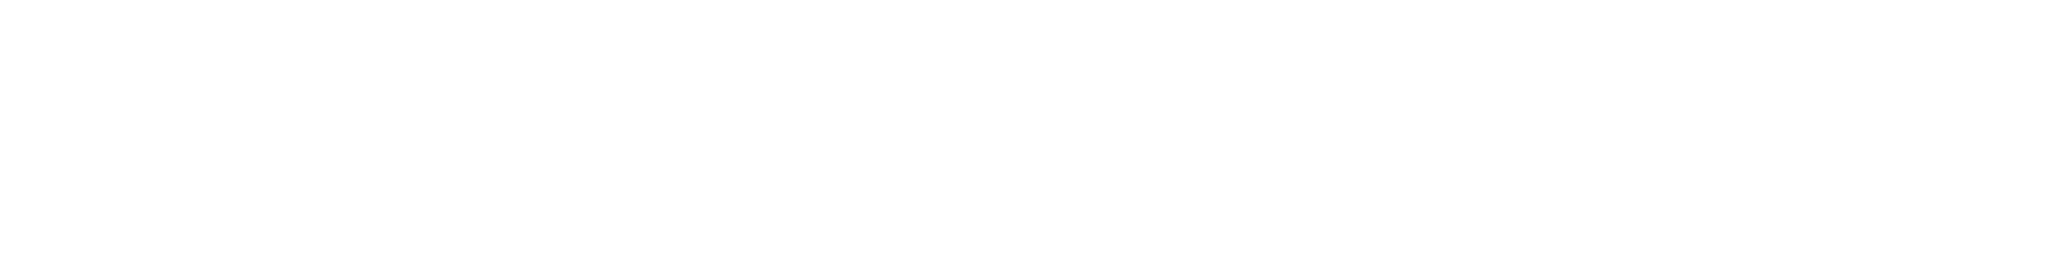

<IPython.core.display.Javascript object>


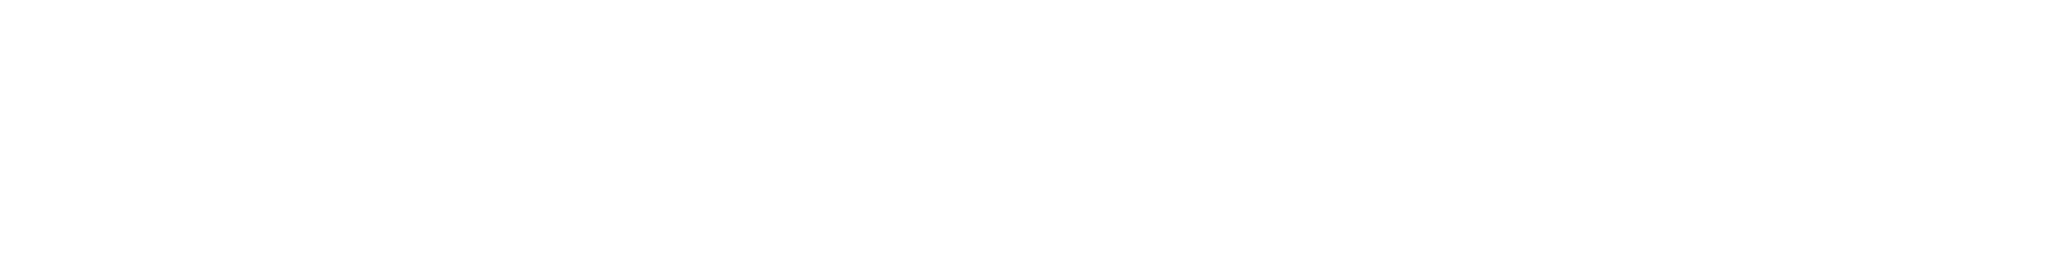

<IPython.core.display.Javascript object>


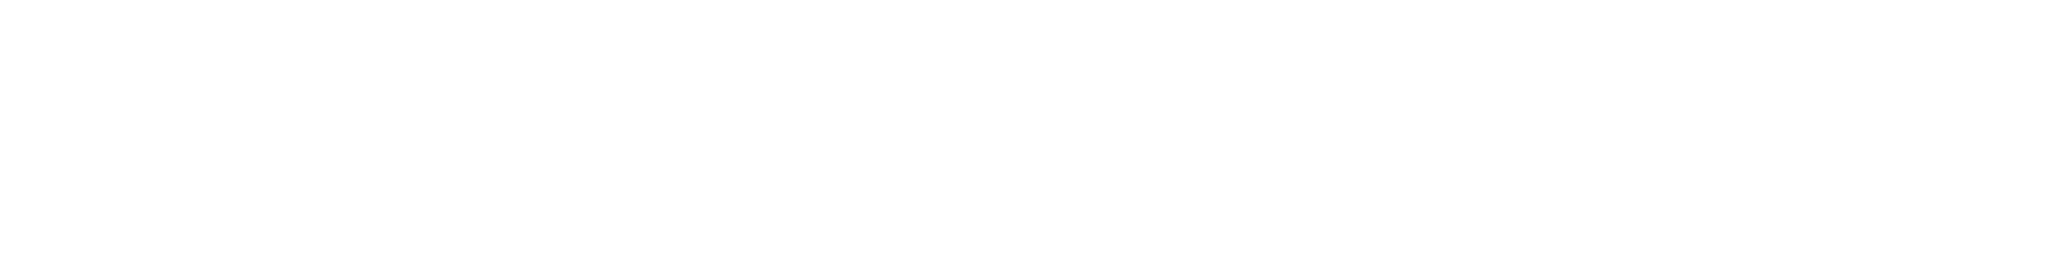

<IPython.core.display.Javascript object>


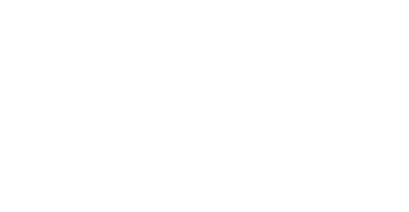

<IPython.core.display.Javascript object>


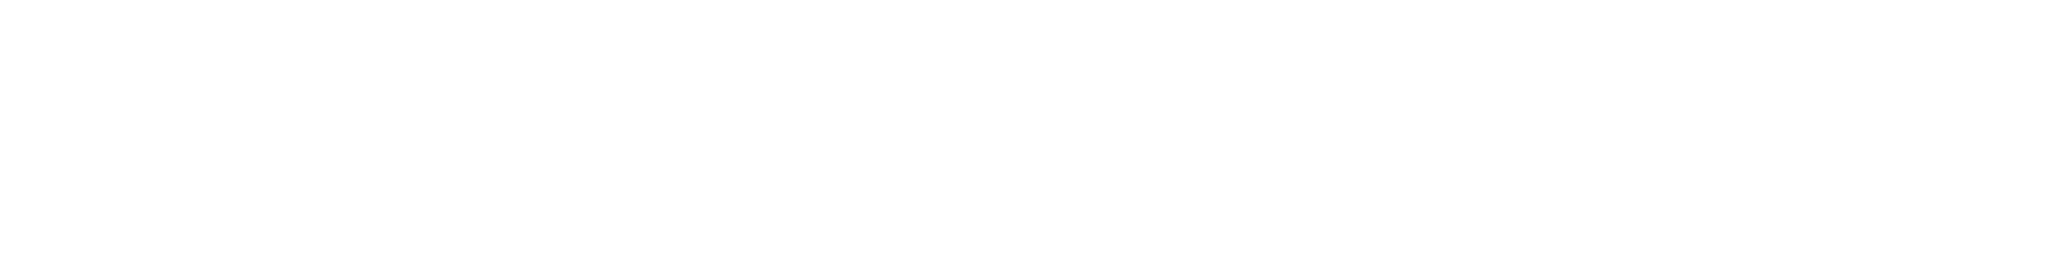

<IPython.core.display.Javascript object>


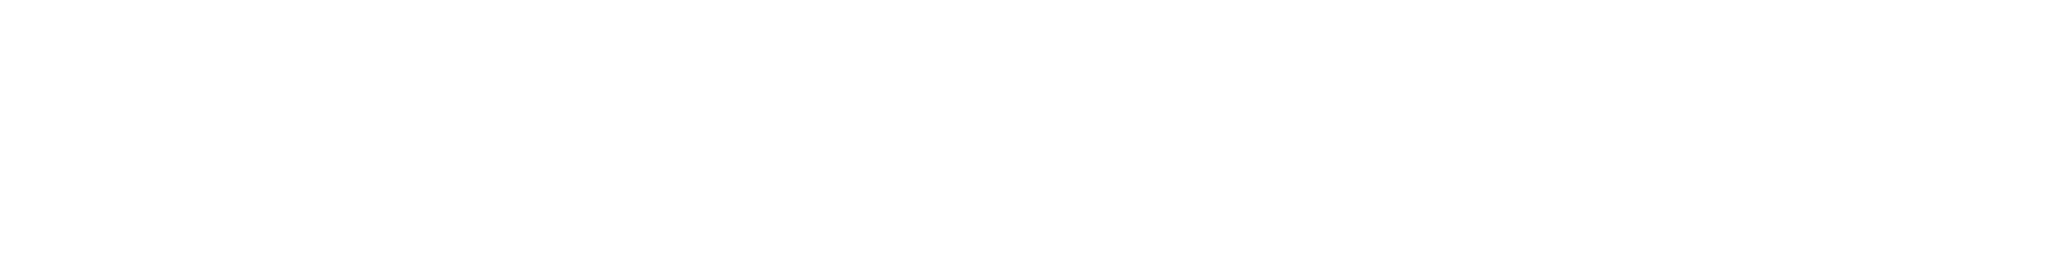

<IPython.core.display.Javascript object>


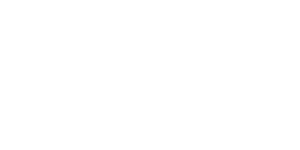

<IPython.core.display.Javascript object>


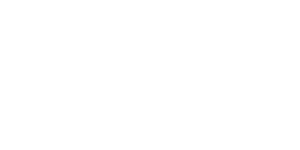

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
%matplotlib notebook
frames=50
for n in range(frames):
    fig = plt.figure(figsize=(15, 2))
    plt.gca().axis([-np.pi, 2*np.pi, 0, 1.2])
    #---Plot the Cycloid--------
    t = np.arange(0, 2*np.pi, 0.001)
    xt=t/2-.5*np.sin(t)      
    yt=.5-.5*np.cos(t)
    plt.gca().plot(xt, yt,color='k')
    #----Plot the Wheel-----------      
    circle = plt.Circle((np.pi*n/frames, 0.5), 0.5,color='r',fill=False)
    plt.gca().add_artist(circle)
    #Plot the point on the rim of the wheel
    plt.gca().plot(np.pi*n/frames -.5*np.sin(2*np.pi*n/frames), .5-.5*np.cos(2*np.pi*n/frames), 'bo')
    plt.savefig(str(n)+'.png')
    plt.close()
       
#----- Save the Animation as cycloid.gif
from PIL import Image
images = []
for n in range(frames):
    exec('a'+str(n)+'=Image.open("'+str(n)+'.png")')
    images.append(eval('a'+str(n)))
images[0].save('cycloid.gif',
               save_all=True,
               append_images=images[1:],
               duration=300,
               loop=0)

### Exercise

:::{admonition} Exercise
**3.1**
A hypocycloid curve is formed by a point on a circle rotating along the inside rim of another circle. The parametric equations are

$x(t) = (a-b) \cos t + b \cos(\frac{a-b}{b}t)$

$y(t) = (a-b) \sin t - b \sin(\frac{a-b}{b}t)$

Create an animation of a hypocycloid curve for the case $a=1$, $b=1/4$. Your animation should resemble the one shown below.
:::


<img src="hypocycloid.gif" width="200" align="center">